# Are theta sweeps good for anything ?

In [11]:
from collections import defaultdict
from hexmaze import plot_hex_maze
import numpy as np

from spyglass_hexmaze.hex_maze_behavior import (
    HexMazeBlock, 
    HexPath, 
    HexPosition,
)
from spyglass_hexmaze.hex_maze_decoding import (
    DecodedHexPosition, 
    DecodedHexPositionSelection,
    DecodedHexPath,
)

display(HexMazeBlock())
display(HexPath())
display(DecodedHexPath())

*nwb_file_name *epoch    *block    config_id      interval_list_ p_a      p_b      p_c      num_trials     task_type     
+------------+ +-------+ +-------+ +------------+ +------------+ +------+ +------+ +------+ +------------+ +------------+
BraveLu2024051 1         1         9,10,17,20,27, epoch1_block1  90.0     10.0     50.0     69             probability ch
BraveLu2024051 1         2         9,10,17,20,27, epoch1_block2  50.0     90.0     10.0     69             probability ch
BraveLu2024051 1         3         9,10,17,20,27, epoch1_block3  50.0     10.0     90.0     67             probability ch
BraveLu2024051 3         1         8,13,21,23,24, epoch3_block1  50.0     90.0     10.0     70             barrier change
BraveLu2024051 3         2         8,13,21,23,28, epoch3_block2  50.0     90.0     10.0     69             barrier change
BraveLu2024051 3         3         8,13,23,24,28, epoch3_block3  50.0     90.0     10.0     68             barrier change
BraveLu2024051 5         1         10,12,18,29,31 epoch5_block1  10.0     50.0     90.0     66             probability ch
BraveLu2024051 5         2         10,12,18,29,31 epoch5_block2  90.0     10.0     50.0     66             probability ch
BraveLu2024051 5         3         10,12,18,29,31 epoch5_block3  50.0     90.0     10.0     66             probability ch
BraveLu2024051 7         1         9,10,15,21,24, epoch7_block1  10.0     50.0     90.0     85             barrier change
BraveLu2024051 7         2         9,10,15,21,22, epoch7_block2  10.0     50.0     90.0     38             barrier change
BraveLu2024051 7         3         9,10,21,22,24, epoch7_block3  10.0     50.0     90.0     75             barrier change
   ...
 (Total: 399)

*pos_merge_id  *nwb_file_name *epoch    analysis_file_ hex_path_objec
+------------+ +------------+ +-------+ +------------+ +------------+
05168a28-1261- Toby20250318_. 7         Toby20250318_O 0d24f4ab-057e-
0859decd-5062- Toby20250316_. 3         Toby20250316_E a6158df1-7e08-
0c43c4b4-6a0d- BraveLu2024061 3         BraveLu2024061 78434ee7-474f-
10adaedd-e994- BraveLu2024062 1         BraveLu2024062 53037a26-00ff-
11c287c0-639b- IM-1478_202207 0         IM-1478_202207 0c4c9906-243f-
15cc27fd-58f4- BraveLu2024051 1         BraveLu2024051 9da030f6-985f-
217d0d25-d4d1- IM-1478_202207 0         IM-1478_202207 7e0e61c7-4510-
2b3be094-e092- BraveLu2024061 1         BraveLu2024061 f6f3fa5e-5386-
3700aa19-2c40- Toby20250316_. 3         Toby20250316_W d4ddaed7-2f0f-
39c63b49-2a87- IM-1478_202207 0         IM-1478_202207 07585733-b647-
3eb15557-bdae- Toby20250316_. 5         Toby20250316_O 5d7f4c4a-2364-
438208e1-f996- BraveLu2024061 1         BraveLu2024061 49017087-b26d-
   ...
 (Total: 37)

*decoding_merg *nwb_file_name *epoch    analysis_file_ hex_path_objec
+------------+ +------------+ +-------+ +------------+ +------------+
298ff516-95c5- IM-1478_202207 0         IM-1478_202207 01645e4b-e923-
2ab779bc-2c30- IM-1478_202207 0         IM-1478_202207 aa26d647-8998-
4aeda101-ab19- IM-1478_202207 0         IM-1478_202207 b72dfe34-ad8b-
f34661fe-39f0- Toby20250316_. 3         Toby20250316_A 488c1cf5-c408-
 (Total: 4)

In [5]:
nwb_file_name = "Toby20250316_.nwb"
epoch = 3
decode_key = {"nwb_file_name": nwb_file_name, "epoch": epoch, "decoding_merge_id": "f34661fe-39f0-9102-fc76-f337f1f98d1d"}
hexpath_key = {"nwb_file_name": nwb_file_name, "epoch": epoch, "pos_merge_id": "3700aa19-2c40-9e11-eac2-18bbf869340b"}
epoch_key = {"nwb_file_name": nwb_file_name, "epoch": epoch}

decode_pos_df = (DecodedHexPosition() & decode_key).fetch_hex_and_position_dataframe()
decode_hexpath_df = (DecodedHexPath() & decode_key).fetch1_dataframe()
hexpath_df = (HexPath() & hexpath_key).fetch1_dataframe()
pos_df = (HexPosition() & hexpath_key).fetch_hex_and_position_dataframe()

decode_pos_df = decode_pos_df.rename(columns={"hex": "pred_hex"}).drop(
    columns=["hex_including_sides", "distance_from_centroid"],
    errors="ignore",
)

display(decode_pos_df)
display(decode_hexpath_df)
display(hexpath_df)
display(pos_df)

combined_df = pos_df.join(decode_pos_df, how="left")
display(combined_df)

/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
ndx-franklab-novela - cached version: 0.2.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
ndx-franklab-novela - cached version: 0.2.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_name

hpd_thresh  spatial_cov    pred_x      pred_y  pred_hex
time                                                                 
1.742158e+09    0.000217         1127   49.1448  118.800402        43
1.742158e+09    0.000442          273   51.1336  120.792098        43
1.742158e+09    0.000217         1164   51.1336  120.792098        43
1.742158e+09    0.000217         1163   51.1336  120.792098        43
1.742158e+09    0.000232          957   51.1336  120.792098        43
...                  ...          ...       ...         ...       ...
1.742161e+09    0.004889           40  176.4280  142.700759         1
1.742161e+09    0.004972           41  176.4280  142.700759         1
1.742161e+09    0.005770           39  176.4280  142.700759         1
1.742161e+09    0.006185           38  176.4280  142.700759         1
1.742161e+09    0.006252           37  176.4280  142.700759         1

[1359469 rows x 5 columns]

nwb_file_name  epoch  block  block_trial_num  epoch_trial_num  hex  \
id                                                                              
0      Toby20250316_.nwb      3      1                1                1   43   
1      Toby20250316_.nwb      3      1                1                1   48   
2      Toby20250316_.nwb      3      1                1                1   43   
3      Toby20250316_.nwb      3      1                1                1   48   
4      Toby20250316_.nwb      3      1                1                1   41   
...                  ...    ...    ...              ...              ...  ...   
36425  Toby20250316_.nwb      3      5               10              216    1   
36426  Toby20250316_.nwb      3      5               10              216    4   
36427  Toby20250316_.nwb      3      5               10              216    1   
36428  Toby20250316_.nwb      3      5               10              216    4   
36429  Toby20250316_.nwb      3      5               10              216    1   

         entry_time     exit_time  duration  hex_in_trial  hex_entry_num  \
id                                                                         
0      1.742158e+09  1.742158e+09     0.010             1              1   
1      1.742158e+09  1.742158e+09     0.052             2              1   
2      1.742158e+09  1.742158e+09     0.000             3              2   
3      1.742158e+09  1.742158e+09     0.050             4              2   
4      1.742158e+09  1.742158e+09     0.054             5              1   
...             ...           ...       ...           ...            ...   
36425  1.742161e+09  1.742161e+09     0.000           794             16   
36426  1.742161e+09  1.742161e+09     0.122           795             22   
36427  1.742161e+09  1.742161e+09     0.058           796             17   
36428  1.742161e+09  1.742161e+09     0.026           797             23   
36429  1.742161e+09  1.742161e+09     0.700           798             18   

       hexes_from_start  hexes_from_end     hex_type maze_portion  
id                                                                 
0                    -1               2      optimal       chosen  
1                    -1               1      optimal       chosen  
2                    -1               2      optimal       chosen  
3                    -1               1      optimal       chosen  
4                    -1               7  non_optimal     unchosen  
...                 ...             ...          ...          ...  
36425                16               0      optimal       chosen  
36426                15               1      optimal       chosen  
36427                16               0      optimal       chosen  
36428                15               1      optimal       chosen  
36429                16               0      optimal       chosen  

[36430 rows x 15 columns]

nwb_file_name  epoch  block  block_trial_num  epoch_trial_num  hex  \
id                                                                             
0     Toby20250316_.nwb      3      1                1                1   43   
1     Toby20250316_.nwb      3      1                1                1   48   
2     Toby20250316_.nwb      3      1                1                1    3   
3     Toby20250316_.nwb      3      1                2                2    3   
4     Toby20250316_.nwb      3      1                2                2   48   
...                 ...    ...    ...              ...              ...  ...   
4671  Toby20250316_.nwb      3      5               10              216   10   
4672  Toby20250316_.nwb      3      5               10              216    7   
4673  Toby20250316_.nwb      3      5               10              216    5   
4674  Toby20250316_.nwb      3      5               10              216    4   
4675  Toby20250316_.nwb      3      5               10              216    1   

        entry_time     exit_time   duration  hex_in_trial  hex_entry_num  \
id                                                                         
0     1.742158e+09  1.742158e+09   0.801999             1              1   
1     1.742158e+09  1.742158e+09   0.410000             2              1   
2     1.742158e+09  1.742158e+09  15.083990             3              1   
3     1.742158e+09  1.742158e+09   1.543999             1              1   
4     1.742158e+09  1.742158e+09   1.973999             2              1   
...            ...           ...        ...           ...            ...   
4671  1.742161e+09  1.742161e+09   5.559996            31              1   
4672  1.742161e+09  1.742161e+09   0.324000            32              1   
4673  1.742161e+09  1.742161e+09   0.470000            33              1   
4674  1.742161e+09  1.742161e+09   0.238000            34              1   
4675  1.742161e+09  1.742161e+09   0.907999            35              1   

      hexes_from_start  hexes_from_end hex_type maze_portion  
id                                                            
0                   -1               2  optimal       chosen  
1                   -1               1  optimal       chosen  
2                   -1               0  optimal       chosen  
3                    0              18  optimal        start  
4                    1              17  optimal        start  
...                ...             ...      ...          ...  
4671                12               4  optimal       chosen  
4672                13               3  optimal       chosen  
4673                14               2  optimal       chosen  
4674                15               1  optimal       chosen  
4675                16               0  optimal       chosen  

[4676 rows x 15 columns]

position_x  position_y  orientation  velocity_x  velocity_y  \
time                                                                        
1.742158e+09   54.494118  119.396471     1.977867    2.082067   -3.152739   
1.742158e+09   54.492941  119.391765     1.977794    2.072712   -3.144536   
1.742158e+09   54.491765  119.387059     1.977722    2.061970   -3.136788   
1.742158e+09   54.490588  119.382353     1.977649    2.049848   -3.129492   
1.742158e+09   54.489412  119.377647     1.977576    2.036352   -3.122641   
...                  ...         ...          ...         ...         ...   
1.742161e+09  179.630588  142.862353     0.599330   -4.603449    7.648578   
1.742161e+09  179.618824  142.875294     0.596590   -4.694164    7.710524   
1.742161e+09  179.607059  142.888235     0.593840   -4.783247    7.771063   
1.742161e+09  179.595294  142.901176     0.591080   -4.870641    7.830143   
1.742161e+09  179.583529  142.914118     0.588310   -4.956288    7.887709   

                 speed  hex hex_including_sides  distance_from_centroid  
time                                                                     
1.742158e+09  3.778196   43                  43                0.547099  
1.742158e+09  3.766197   43                  43                0.547980  
1.742158e+09  3.753819   43                  43                0.548903  
1.742158e+09  3.741069   43                  43                0.549866  
1.742158e+09  3.727950   43                  43                0.550871  
...                ...  ...                 ...                     ...  
1.742161e+09  8.927065    1                   1                8.330702  
1.742161e+09  9.027035    1                   1                8.322217  
1.742161e+09  9.125178    1                   1                8.313760  
1.742161e+09  9.221403    1                   1                8.305332  
1.742161e+09  9.315618    1                   1                8.296932  

[1359469 rows x 9 columns]

position_x  position_y  orientation  velocity_x  velocity_y  \
time                                                                        
1.742158e+09   54.494118  119.396471     1.977867    2.082067   -3.152739   
1.742158e+09   54.492941  119.391765     1.977794    2.072712   -3.144536   
1.742158e+09   54.491765  119.387059     1.977722    2.061970   -3.136788   
1.742158e+09   54.490588  119.382353     1.977649    2.049848   -3.129492   
1.742158e+09   54.489412  119.377647     1.977576    2.036352   -3.122641   
...                  ...         ...          ...         ...         ...   
1.742161e+09  179.630588  142.862353     0.599330   -4.603449    7.648578   
1.742161e+09  179.618824  142.875294     0.596590   -4.694164    7.710524   
1.742161e+09  179.607059  142.888235     0.593840   -4.783247    7.771063   
1.742161e+09  179.595294  142.901176     0.591080   -4.870641    7.830143   
1.742161e+09  179.583529  142.914118     0.588310   -4.956288    7.887709   

                 speed  hex hex_including_sides  distance_from_centroid  \
time                                                                      
1.742158e+09  3.778196   43                  43                0.547099   
1.742158e+09  3.766197   43                  43                0.547980   
1.742158e+09  3.753819   43                  43                0.548903   
1.742158e+09  3.741069   43                  43                0.549866   
1.742158e+09  3.727950   43                  43                0.550871   
...                ...  ...                 ...                     ...   
1.742161e+09  8.927065    1                   1                8.330702   
1.742161e+09  9.027035    1                   1                8.322217   
1.742161e+09  9.125178    1                   1                8.313760   
1.742161e+09  9.221403    1                   1                8.305332   
1.742161e+09  9.315618    1                   1                8.296932   

              hpd_thresh  spatial_cov    pred_x      pred_y  pred_hex  
time                                                                   
1.742158e+09    0.000217         1127   49.1448  118.800402        43  
1.742158e+09    0.000442          273   51.1336  120.792098        43  
1.742158e+09    0.000217         1164   51.1336  120.792098        43  
1.742158e+09    0.000217         1163   51.1336  120.792098        43  
1.742158e+09    0.000232          957   51.1336  120.792098        43  
...                  ...          ...       ...         ...       ...  
1.742161e+09    0.004889           40  176.4280  142.700759         1  
1.742161e+09    0.004972           41  176.4280  142.700759         1  
1.742161e+09    0.005770           39  176.4280  142.700759         1  
1.742161e+09    0.006185           38  176.4280  142.700759         1  
1.742161e+09    0.006252           37  176.4280  142.700759         1  

[1359469 rows x 14 columns]

In [7]:
from spyglass.common import IntervalList
from hexmaze import classify_maze_hexes, get_hexes_from_port, divide_into_thirds, get_critical_choice_points
import pandas as pd

# Get trials for this nwb+epoch
trials = HexMazeBlock().Trial() & epoch_key

# Accumulate per-trial dataframes
all_hex_paths = []

for trial in trials:
    # Get trial time bounds
    trial_start, trial_end = (
        IntervalList
        & {
            "nwb_file_name": trial["nwb_file_name"],
            "interval_list_name": trial["interval_list_name"],
        }
    ).fetch1("valid_times")[0]

    # Get maze configuration and attributes
    maze = (
        HexMazeBlock()
        & {
            "nwb_file_name": trial["nwb_file_name"],
            "block": trial["block"],
            "epoch": trial["epoch"],
        }
    ).fetch1("config_id")
    critical_choice_points = get_critical_choice_points(maze)
    hex_type_dict = classify_maze_hexes(maze)

    # Filter position data to this trial
    trial_mask = (combined_df.index >= trial_start) & (
        combined_df.index <= trial_end
    )
    trial_df = combined_df.loc[trial_mask].copy()
    
    
    # Identify contiguous hex segments
    trial_df["segment"] = (
        trial_df["hex"] != trial_df["hex"].shift()
    ).cumsum()

    # Set up dataframe of hex entries for this trial
    hex_path = (
        trial_df.groupby("segment")
        .agg(
            hex=("hex", "first"),
            entry_time=("hex", lambda x: x.index[0]),
            exit_time=("hex", lambda x: x.index[-1]),
        )
        .reset_index(drop=True)
    )
    
    trial_df["duration"] = trial_df.index.to_series().diff().shift(-1).fillna(0)

    hex_pred_dicts = (
        trial_df.groupby("segment")
        .apply(lambda g: g.groupby("pred_hex")["duration"].sum().to_dict())
        .tolist()
    )
    
    hex_path["hex_pred_dict"] = hex_pred_dicts

    # Time spent in each hex
    hex_path["duration"] = hex_path["exit_time"] - hex_path["entry_time"]

    # What number hex entry in the trial this is
    hex_path["hex_in_trial"] = range(1, len(hex_path) + 1)

    # Count the number of times the rat has entered this specific hex in this trial
    hex_path["hex_entry_num"] = hex_path.groupby("hex").cumcount() + 1

    # For each hex, compute distances to start and end port
    if (
        trial["start_port"] == "None"
    ):  # first trial does not have a start port, so we just fill with -1
        hex_path["hexes_from_start"] = [-1] * len(hex_path)
    else:
        hex_path["hexes_from_start"] = [
            get_hexes_from_port(
                maze, start_hex=h, reward_port=trial["start_port"]
            )
            for h in hex_path["hex"]
        ]
    hex_path["hexes_from_end"] = [
        get_hexes_from_port(maze, start_hex=h, reward_port=trial["end_port"])
        for h in hex_path["hex"]
    ]

    # Classify each hex as optimal, non-optimal, or dead-end
    hex_to_type = {
        h: group_name.replace("_hexes", "")
        for group_name, hexes in hex_type_dict.items()
        if group_name
        in {"optimal_hexes", "non_optimal_hexes", "dead_end_hexes"}
        for h in hexes
    }
    hex_path["hex_type"] = hex_path["hex"].map(hex_to_type)

    # Map each hex to the section of the maze it's in (1, 2, or 3 for near port A, B, or C)
    thirds = divide_into_thirds(maze)
    hex_to_maze_third = {
        h: third_num
        for third_num, hexes in enumerate(thirds, start=1)
        for h in hexes
    }
    # Map choice points to section 0
    hex_to_maze_third.update({h: 0 for h in critical_choice_points})

    # Identify the maze sections as 'start', 'chosen', or 'unchosen'
    # Note that for the first trial, start_port is None so start_section and unchosen_section will both be None
    port_map = {"A": 1, "B": 2, "C": 3}
    start_section = port_map.get(trial["start_port"])
    chosen_section = port_map.get(trial["end_port"])
    unchosen_section = {1, 2, 3} - {chosen_section} - {start_section}
    unchosen_section = (
        unchosen_section.pop() if len(unchosen_section) == 1 else None
    )

    # Map maze section number to its label
    label = {
        start_section: "start",
        chosen_section: "chosen",
        unchosen_section: "unchosen",
        0: "choice_point",
    }

    # Assign maze section label for each hex (if no label, e.g. first section of first trial, it will be "None")
    hex_path["maze_portion"] = (
        hex_path["hex"]
        .map(lambda h: label.get(hex_to_maze_third.get(h)))
        .astype("str")
    )

    # Add block/trial key columns for ease of combination later
    hex_path["nwb_file_name"] = trial["nwb_file_name"]
    hex_path["epoch"] = trial["epoch"]
    hex_path["block"] = trial["block"]
    hex_path["block_trial_num"] = trial["block_trial_num"]
    hex_path["epoch_trial_num"] = trial["epoch_trial_num"]
    # Put the key columns on the left
    hex_path = hex_path[
        [
            "nwb_file_name",
            "epoch",
            "block",
            "block_trial_num",
            "epoch_trial_num",
        ]
        + [
            c
            for c in hex_path.columns
            if c
            not in {
                "nwb_file_name",
                "epoch",
                "block",
                "block_trial_num",
                "epoch_trial_num",
            }
        ]
    ]

    # Add the hex path for this trial
    all_hex_paths.append(hex_path)

# Concatenate per-trial dataframes into one big dataframe
hex_path_all_trials = pd.concat(all_hex_paths, ignore_index=True)

/tmp/ipykernel_207216/3751369578.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.groupby("pred_hex")["duration"].sum().to_dict())
/tmp/ipykernel_207216/3751369578.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.groupby("pred_hex")["duration"].sum().to_dict())
/tmp/ipykernel_207216/3751369578.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. 

In [8]:
hex_path_all_trials

nwb_file_name  epoch  block  block_trial_num  epoch_trial_num  hex  \
0     Toby20250316_.nwb      3      1                1                1   43   
1     Toby20250316_.nwb      3      1                1                1   48   
2     Toby20250316_.nwb      3      1                1                1    3   
3     Toby20250316_.nwb      3      1                2                2    3   
4     Toby20250316_.nwb      3      1                2                2   48   
...                 ...    ...    ...              ...              ...  ...   
4671  Toby20250316_.nwb      3      5               10              216   10   
4672  Toby20250316_.nwb      3      5               10              216    7   
4673  Toby20250316_.nwb      3      5               10              216    5   
4674  Toby20250316_.nwb      3      5               10              216    4   
4675  Toby20250316_.nwb      3      5               10              216    1   

        entry_time     exit_time  \
0     1.742158e+09  1.742158e+09   
1     1.742158e+09  1.742158e+09   
2     1.742158e+09  1.742158e+09   
3     1.742158e+09  1.742158e+09   
4     1.742158e+09  1.742158e+09   
...            ...           ...   
4671  1.742161e+09  1.742161e+09   
4672  1.742161e+09  1.742161e+09   
4673  1.742161e+09  1.742161e+09   
4674  1.742161e+09  1.742161e+09   
4675  1.742161e+09  1.742161e+09   

                                          hex_pred_dict   duration  \
0     {41: 0.09000015258789062, 43: 0.23999953269958...   0.801999   
1                              {48: 0.4119997024536133}   0.410000   
2     {2: 0.059999942779541016, 3: 12.52599215507507...  15.083990   
3     {3: 0.0019998550415039062, 33: 0.2459995746612...   1.543999   
4     {2: 0.002000093460083008, 3: 0.054000139236450...   1.973999   
...                                                 ...        ...   
4671  {1: 0.003999948501586914, 3: 0.381999969482421...   5.559996   
4672  {5: 0.006000041961669922, 7: 0.275999784469604...   0.324000   
4673  {4: 0.10799980163574219, 5: 0.3159997463226318...   0.470000   
4674  {1: 0.002000093460083008, 4: 0.23799991607666016}   0.238000   
4675    {1: 0.7599995136260986, 4: 0.14799976348876953}   0.907999   

      hex_in_trial  hex_entry_num  hexes_from_start  hexes_from_end hex_type  \
0                1              1                -1               2  optimal   
1                2              1                -1               1  optimal   
2                3              1                -1               0  optimal   
3                1              1                 0              18  optimal   
4                2              1                 1              17  optimal   
...            ...            ...               ...             ...      ...   
4671            31              1                12               4  optimal   
4672            32              1                13               3  optimal   
4673            33              1                14               2  optimal   
4674            34              1                15               1  optimal   
4675            35              1                16               0  optimal   

     maze_portion  
0          chosen  
1          chosen  
2          chosen  
3           start  
4           start  
...           ...  
4671       chosen  
4672       chosen  
4673       chosen  
4674       chosen  
4675       chosen  

[4676 rows x 16 columns]

In [9]:
min_rep_duration = 0.01

hex_path_all_trials["repped_hexes"] = hex_path_all_trials["hex_pred_dict"].apply(
    lambda d: [k for k, v in d.items() if v >= min_rep_duration]
)

display(hex_path_all_trials)

nwb_file_name  epoch  block  block_trial_num  epoch_trial_num  hex  \
0     Toby20250316_.nwb      3      1                1                1   43   
1     Toby20250316_.nwb      3      1                1                1   48   
2     Toby20250316_.nwb      3      1                1                1    3   
3     Toby20250316_.nwb      3      1                2                2    3   
4     Toby20250316_.nwb      3      1                2                2   48   
...                 ...    ...    ...              ...              ...  ...   
4671  Toby20250316_.nwb      3      5               10              216   10   
4672  Toby20250316_.nwb      3      5               10              216    7   
4673  Toby20250316_.nwb      3      5               10              216    5   
4674  Toby20250316_.nwb      3      5               10              216    4   
4675  Toby20250316_.nwb      3      5               10              216    1   

        entry_time     exit_time  \
0     1.742158e+09  1.742158e+09   
1     1.742158e+09  1.742158e+09   
2     1.742158e+09  1.742158e+09   
3     1.742158e+09  1.742158e+09   
4     1.742158e+09  1.742158e+09   
...            ...           ...   
4671  1.742161e+09  1.742161e+09   
4672  1.742161e+09  1.742161e+09   
4673  1.742161e+09  1.742161e+09   
4674  1.742161e+09  1.742161e+09   
4675  1.742161e+09  1.742161e+09   

                                          hex_pred_dict   duration  \
0     {41: 0.09000015258789062, 43: 0.23999953269958...   0.801999   
1                              {48: 0.4119997024536133}   0.410000   
2     {2: 0.059999942779541016, 3: 12.52599215507507...  15.083990   
3     {3: 0.0019998550415039062, 33: 0.2459995746612...   1.543999   
4     {2: 0.002000093460083008, 3: 0.054000139236450...   1.973999   
...                                                 ...        ...   
4671  {1: 0.003999948501586914, 3: 0.381999969482421...   5.559996   
4672  {5: 0.006000041961669922, 7: 0.275999784469604...   0.324000   
4673  {4: 0.10799980163574219, 5: 0.3159997463226318...   0.470000   
4674  {1: 0.002000093460083008, 4: 0.23799991607666016}   0.238000   
4675    {1: 0.7599995136260986, 4: 0.14799976348876953}   0.907999   

      hex_in_trial  hex_entry_num  hexes_from_start  hexes_from_end hex_type  \
0                1              1                -1               2  optimal   
1                2              1                -1               1  optimal   
2                3              1                -1               0  optimal   
3                1              1                 0              18  optimal   
4                2              1                 1              17  optimal   
...            ...            ...               ...             ...      ...   
4671            31              1                12               4  optimal   
4672            32              1                13               3  optimal   
4673            33              1                14               2  optimal   
4674            34              1                15               1  optimal   
4675            35              1                16               0  optimal   

     maze_portion                                       repped_hexes  
0          chosen                                       [41, 43, 48]  
1          chosen                                               [48]  
2          chosen                         [2, 3, 10, 33, 45, 48, 49]  
3           start                                       [33, 43, 48]  
4           start                    [3, 14, 33, 36, 41, 43, 45, 48]  
...           ...                                                ...  
4671       chosen  [3, 4, 6, 7, 10, 13, 29, 30, 33, 35, 36, 37, 4...  
4672       chosen                                            [7, 10]  
4673       chosen                                          [4, 5, 7]  
4674       chosen                                                [4]  
4675       chosen                

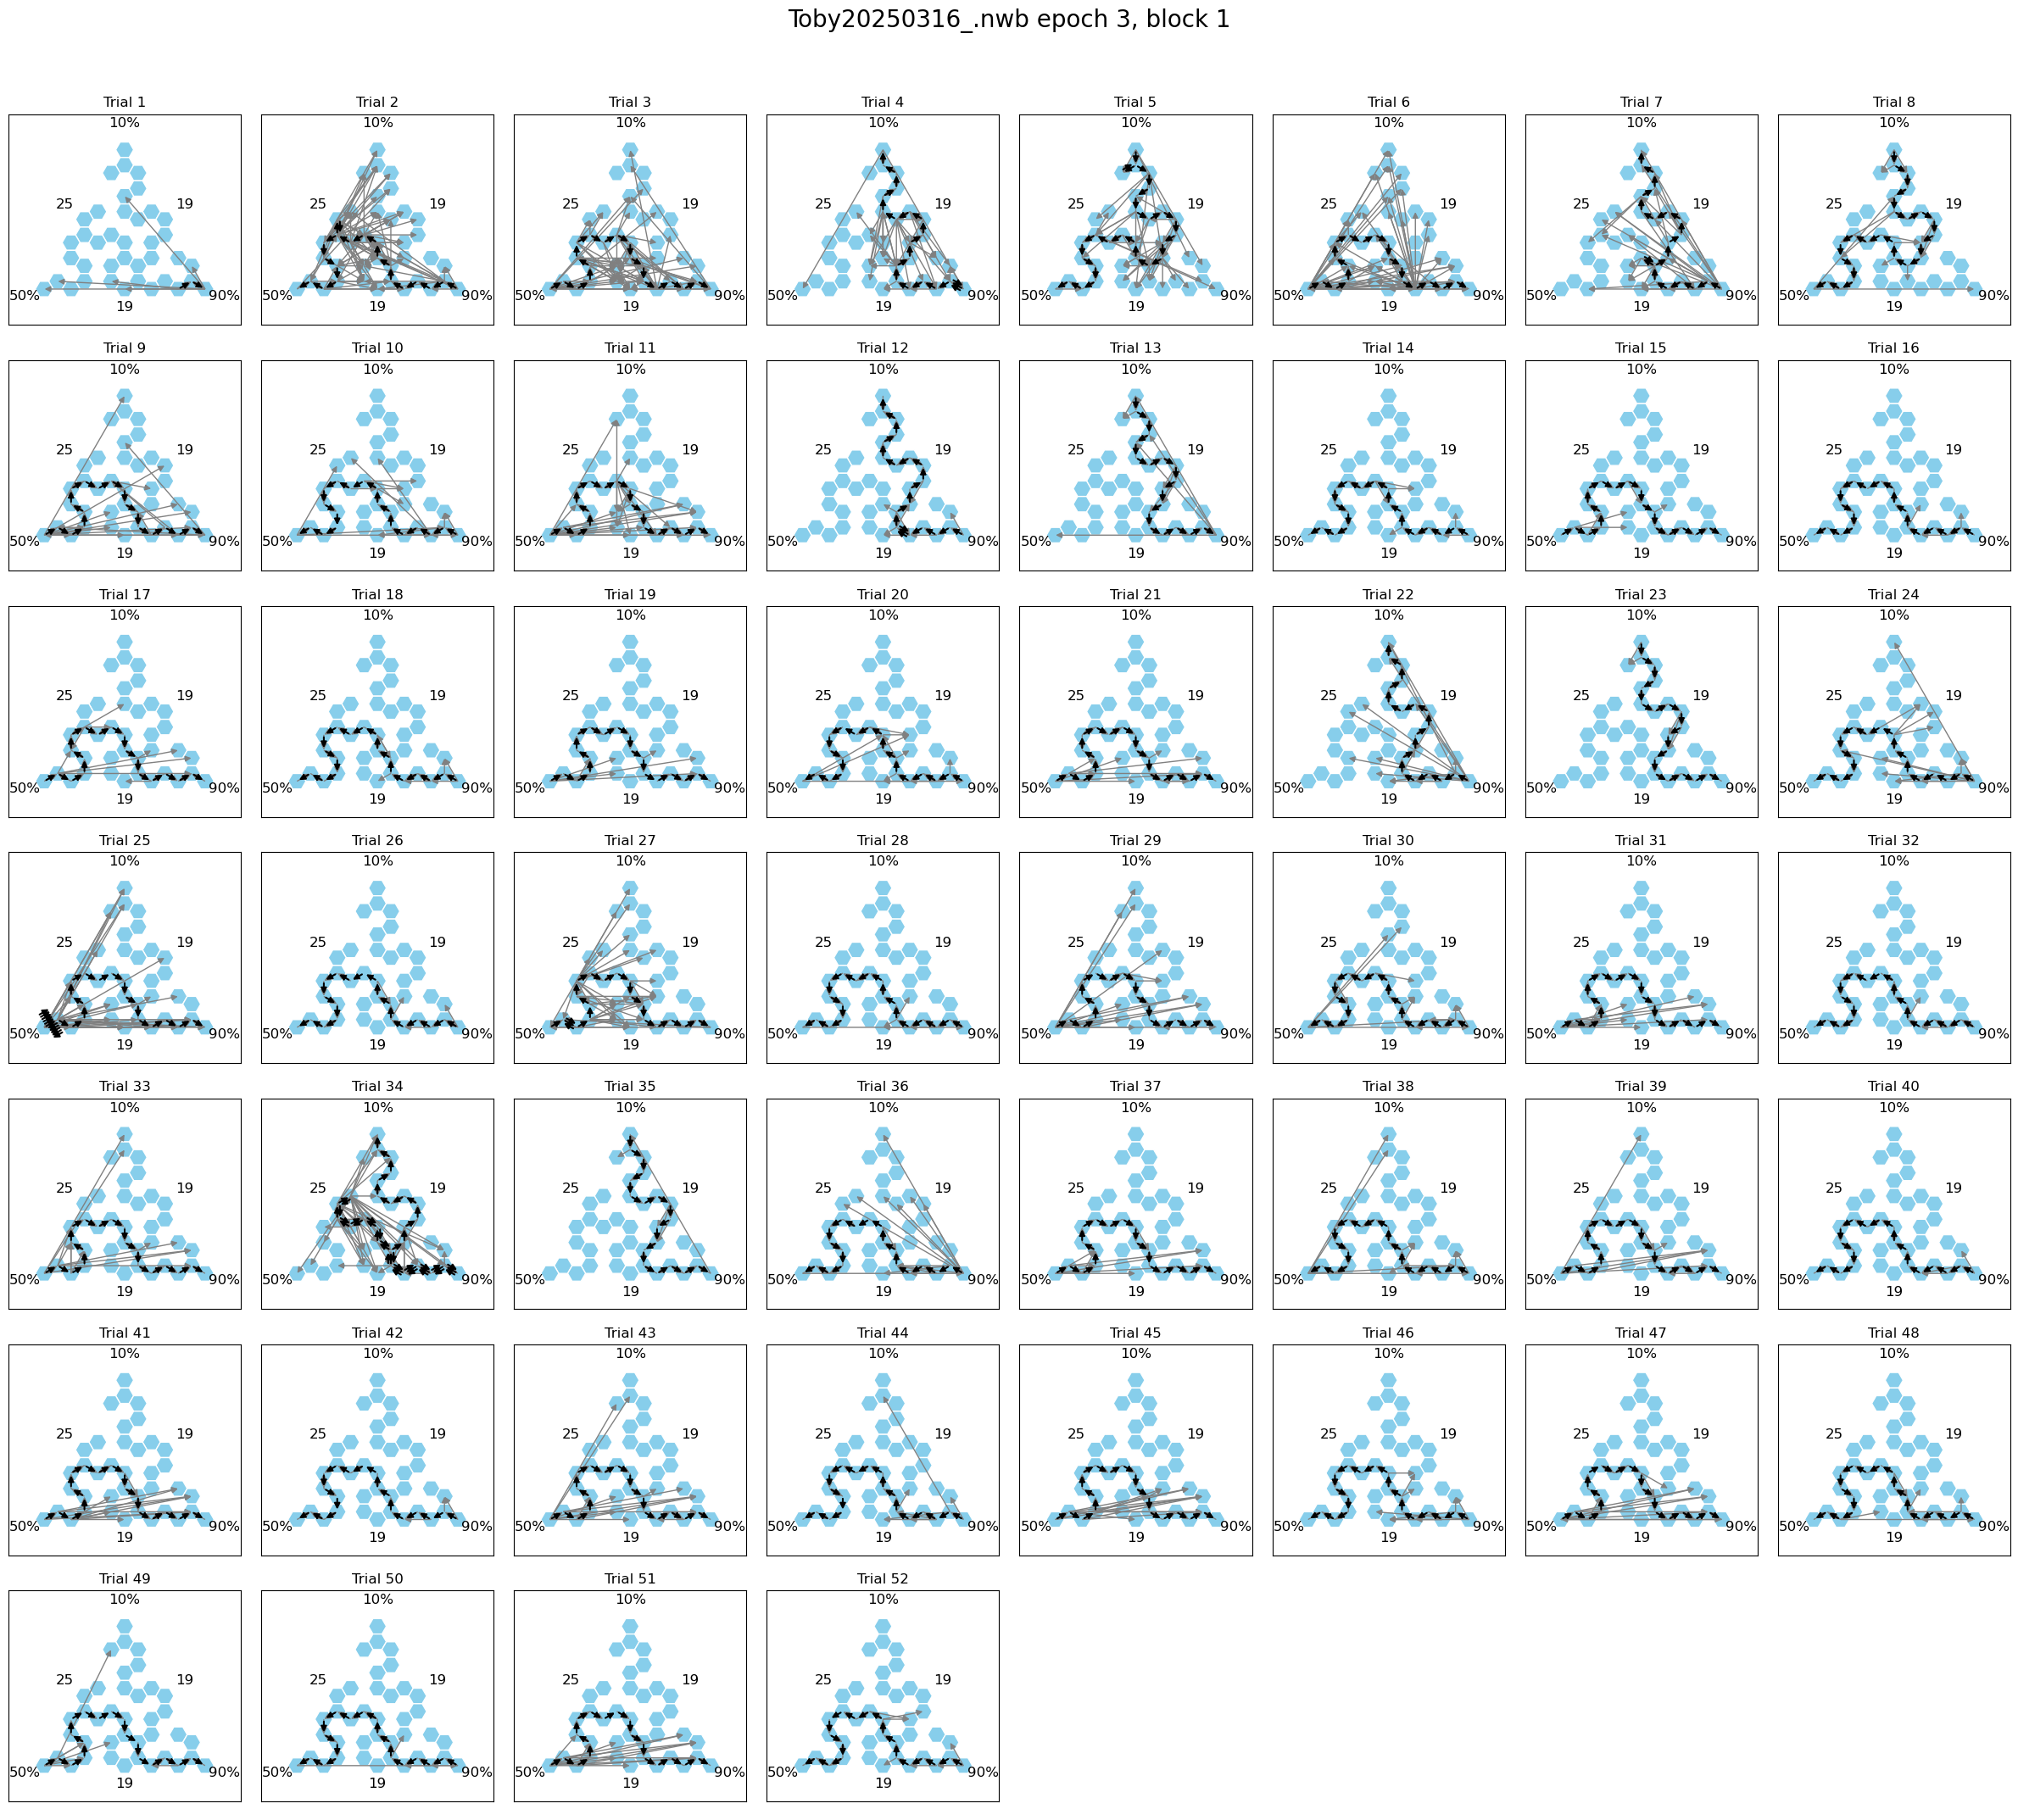

In [12]:
block = 1

# Fetch all trial paths for the block at once
df_block = hex_path_all_trials[hex_path_all_trials["block"] == block]
df_block.reset_index(drop=True)

trials = sorted(df_block["block_trial_num"].unique())
num_trials = len(trials)

# Fetch block info
nwb_file, epoch = epoch_key["nwb_file_name"], epoch_key["epoch"]

# Fetch maze config and reward probabilities for this block
block_entry = HexMazeBlock() & {
    "nwb_file_name": nwb_file,
    "epoch": epoch,
    "block": block,
}
maze_config = block_entry.fetch1("config_id")
reward_probs = [int(block_entry.fetch1(f"p_{x}")) for x in ["a", "b", "c"]]

# Determine square-ish grid
ncols = int(np.ceil(np.sqrt(num_trials)))
nrows = int(np.ceil(num_trials / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))

# Make sure axes is 1D so flatten doesn't break
if isinstance(axes, plt.Axes):
    axes = np.array([axes])
else:
    axes = np.array(axes).flatten()

# Big title
fig.suptitle(f"{nwb_file} epoch {epoch}, block {block}", fontsize=20, y=1.02)

# Loop over trials and plot hex path for each one
for i, tri_num in enumerate(trials):
    df_trial = df_block[df_block["block_trial_num"] == tri_num]
    if df_trial.empty:
        raise ValueError(
            f"No hex path found for block {block}, trial {tri_num}"
        )
    hex_path = df_trial["hex"].tolist()
    
    # Get hexes repped while the rat is in each hex
    hex_to_pred = defaultdict(list)
    for _, row in df_trial.iterrows():
        hex_id = row["hex"]
        hex_to_pred[hex_id].extend(row["repped_hexes"])
    hex_to_pred = {h: list(set(v)) for h, v in hex_to_pred.items()}

    plot_hex_maze(
        barriers=maze_config,
        ax=axes[i],
        hex_path=hex_path,
        arrows=hex_to_pred,
        show_barriers=False,
        show_choice_points=False,
        show_hex_labels=False,
        show_stats=True,
        reward_probabilities=reward_probs,
    )
    axes[i].set_title(f"Trial {tri_num}")

# Hide unused axes
for j in range(num_trials, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


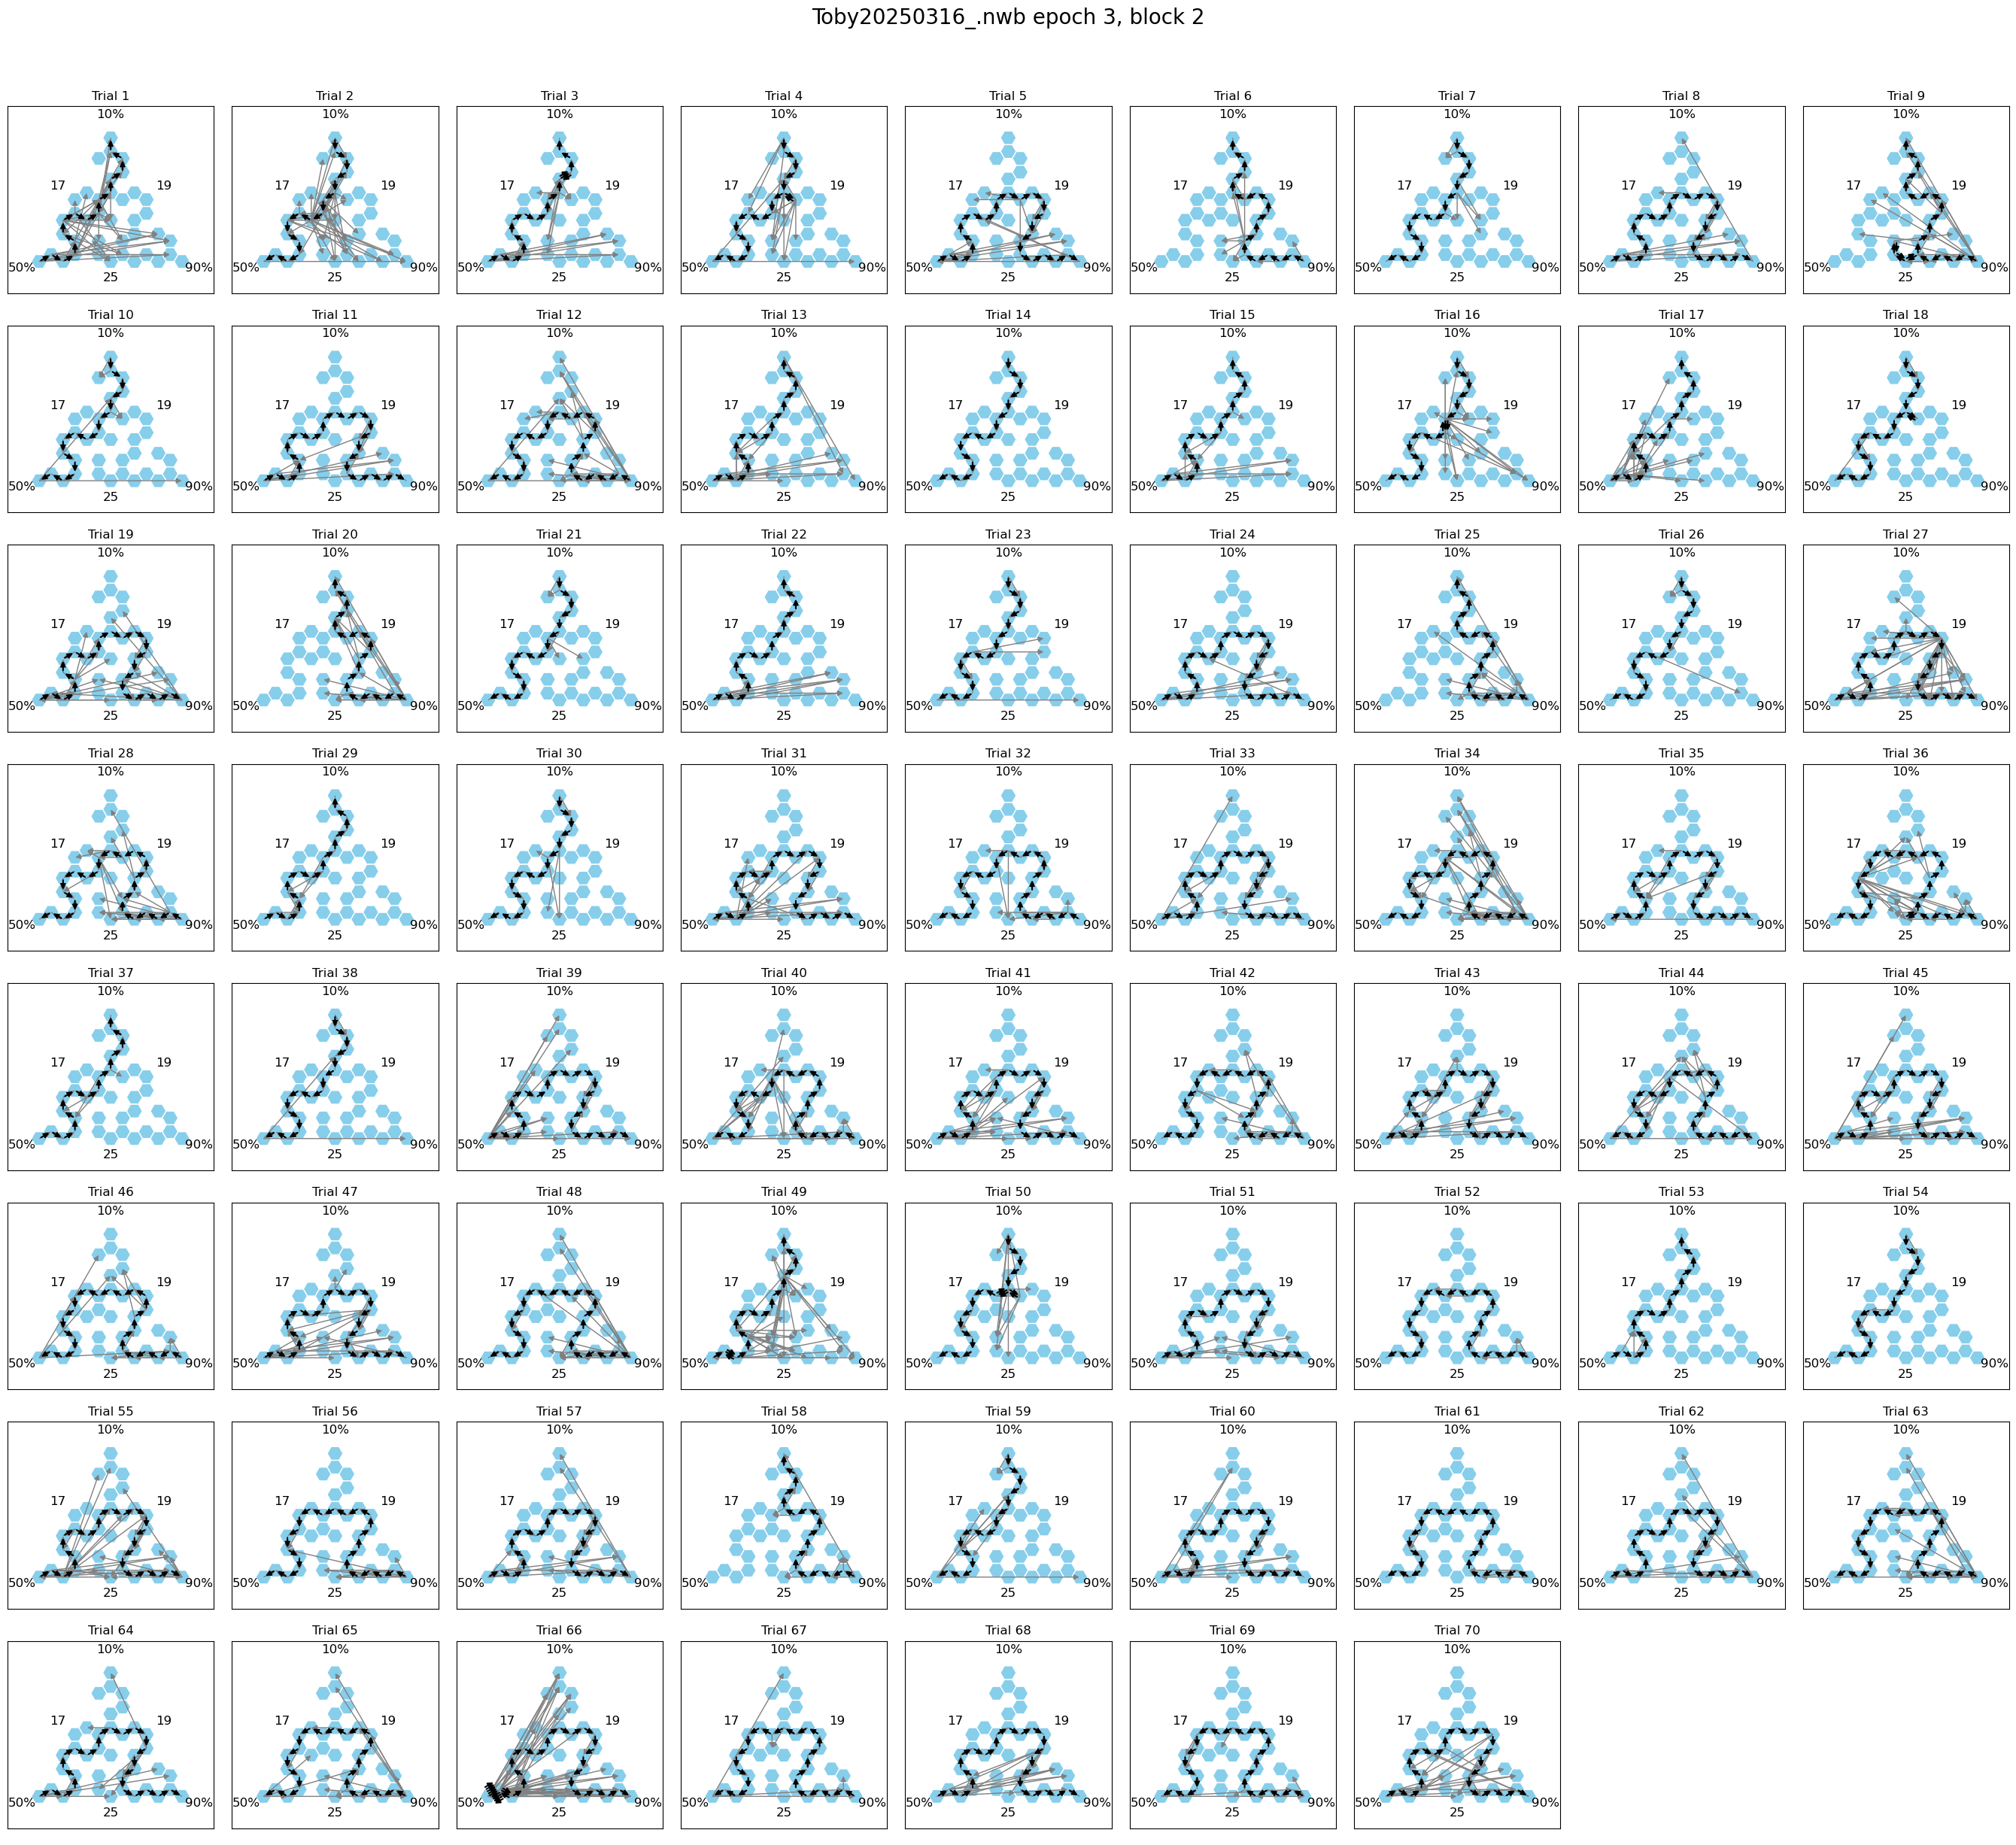

In [13]:
block = 2

# Fetch all trial paths for the block at once
df_block = hex_path_all_trials[hex_path_all_trials["block"] == block]
df_block.reset_index(drop=True)

trials = sorted(df_block["block_trial_num"].unique())
num_trials = len(trials)

# Fetch block info
nwb_file, epoch = epoch_key["nwb_file_name"], epoch_key["epoch"]

# Fetch maze config and reward probabilities for this block
block_entry = HexMazeBlock() & {
    "nwb_file_name": nwb_file,
    "epoch": epoch,
    "block": block,
}
maze_config = block_entry.fetch1("config_id")
reward_probs = [int(block_entry.fetch1(f"p_{x}")) for x in ["a", "b", "c"]]

# Determine square-ish grid
ncols = int(np.ceil(np.sqrt(num_trials)))
nrows = int(np.ceil(num_trials / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))

# Make sure axes is 1D so flatten doesn't break
if isinstance(axes, plt.Axes):
    axes = np.array([axes])
else:
    axes = np.array(axes).flatten()

# Big title
fig.suptitle(f"{nwb_file} epoch {epoch}, block {block}", fontsize=20, y=1.02)

# Loop over trials and plot hex path for each one
for i, tri_num in enumerate(trials):
    df_trial = df_block[df_block["block_trial_num"] == tri_num]
    if df_trial.empty:
        raise ValueError(
            f"No hex path found for block {block}, trial {tri_num}"
        )
    hex_path = df_trial["hex"].tolist()
    
    # Get hexes repped while the rat is in each hex
    hex_to_pred = defaultdict(list)
    for _, row in df_trial.iterrows():
        hex_id = row["hex"]
        hex_to_pred[hex_id].extend(row["repped_hexes"])
    hex_to_pred = {h: list(set(v)) for h, v in hex_to_pred.items()}

    plot_hex_maze(
        barriers=maze_config,
        ax=axes[i],
        hex_path=hex_path,
        arrows=hex_to_pred,
        show_barriers=False,
        show_choice_points=False,
        show_hex_labels=False,
        show_stats=True,
        reward_probabilities=reward_probs,
    )
    axes[i].set_title(f"Trial {tri_num}")

# Hide unused axes
for j in range(num_trials, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [90]:
block = 3

# Fetch all trial paths for the block at once
df_block = hex_path_all_trials[hex_path_all_trials["block"] == block]
df_block.reset_index(drop=True)

trials = sorted(df_block["block_trial_num"].unique())
num_trials = len(trials)

# Fetch block info
nwb_file, epoch = epoch_key["nwb_file_name"], epoch_key["epoch"]

# Fetch maze config and reward probabilities for this block
block_entry = HexMazeBlock() & {
    "nwb_file_name": nwb_file,
    "epoch": epoch,
    "block": block,
}
maze_config = block_entry.fetch1("config_id")
reward_probs = [int(block_entry.fetch1(f"p_{x}")) for x in ["a", "b", "c"]]

# Determine square-ish grid
ncols = int(np.ceil(np.sqrt(num_trials)))
nrows = int(np.ceil(num_trials / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))

# Make sure axes is 1D so flatten doesn't break
if isinstance(axes, plt.Axes):
    axes = np.array([axes])
else:
    axes = np.array(axes).flatten()

# Big title
fig.suptitle(f"{nwb_file} epoch {epoch}, block {block}", fontsize=20, y=1.02)

# Loop over trials and plot hex path for each one
for i, tri_num in enumerate(trials):
    df_trial = df_block[df_block["block_trial_num"] == tri_num]
    if df_trial.empty:
        raise ValueError(
            f"No hex path found for block {block}, trial {tri_num}"
        )
    hex_path = df_trial["hex"].tolist()
    
    # Get hexes repped while the rat is in each hex
    hex_to_pred = defaultdict(list)
    for _, row in df_trial.iterrows():
        hex_id = row["hex"]
        hex_to_pred[hex_id].extend(row["repped_hexes"])
    hex_to_pred = {h: list(set(v)) for h, v in hex_to_pred.items()}

    plot_hex_maze(
        barriers=maze_config,
        ax=axes[i],
        hex_path=hex_path,
        arrows=hex_to_pred,
        show_barriers=False,
        show_choice_points=False,
        show_hex_labels=False,
        show_stats=True,
        reward_probabilities=reward_probs,
    )
    axes[i].set_title(f"Trial {tri_num}")

# Hide unused axes
for j in range(num_trials, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from hexmaze import plot_hex_maze

def plot_trial_v2(block, block_trial_num, ax=None, show_stats=True):
        """Plot a single trial's trajectory on the hex maze."""
        
        selfi = (DecodedHexPath() & decode_key)

        # Fetch the hex path df for this trial
        df = selfi.fetch_trial(block, block_trial_num)
        if df.empty:
            raise ValueError(
                f"No hex path found for block {block}, trial {block_trial_num}"
            )

        hex_representation_durations = df.groupby('hex')['duration'].sum().to_dict()

        # Fetch the key for this HexPath entry
        key = selfi.fetch1("KEY")  # contains nwb_file_name + epoch

        # Fetch maze config for the given block in this epoch
        block_entry = HexMazeBlock() & {
            "nwb_file_name": key["nwb_file_name"],
            "epoch": key["epoch"],
            "block": block,
        }
        maze_config = block_entry.fetch1("config_id")

        if show_stats:
            reward_probs = [int(block_entry.fetch1(f"p_{x}")) for x in ["a", "b", "c"]]
        else:
            reward_probs = None

        # Create figure if no axis provided
        created_fig = False
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 6))
            created_fig = True

        # Plot the maze with the hex path
        # If show_stats, add path lengths and reward probabilities
        plot_hex_maze(
            barriers=maze_config,
            ax=ax,
            #hex_path=hex_path,
            color_by=hex_representation_durations,
            vmin=-.5,
            vmax=2,
            colormap='Reds',
            show_barriers=False,
            show_choice_points=False,
            show_hex_labels=False,
            show_stats=show_stats,
            reward_probabilities=reward_probs,
        )
        ax.set_title(f"Block {block}, Trial {block_trial_num}")

        if created_fig:
            plt.tight_layout()
            plt.show()
        return ax
    
block_trial_num = 25

plot_trial_v2(block=1, block_trial_num=block_trial_num)

(DecodedHexPath() & decode_key).plot_trial(block=1, block_trial_num=block_trial_num)

<Axes: title={'center': 'Block 1, Trial 25'}>

# What we want:
- filter to moving times
- plot trajectory
- heatmap of what's repped!


In [45]:
import numpy as np

decode_pos_df = (DecodedHexPosition & decode_key).fetch_hex_and_position_dataframe()

display(decode_pos_df)
display(position_df)
display(decode_df)

/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
ndx-franklab-novela - cached version: 0.2.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


hpd_thresh  spatial_cov    pred_x      pred_y  hex  \
time                                                               
1.742158e+09    0.000217         1127   49.1448  118.800402   43   
1.742158e+09    0.000442          273   51.1336  120.792098   43   
1.742158e+09    0.000217         1164   51.1336  120.792098   43   
1.742158e+09    0.000217         1163   51.1336  120.792098   43   
1.742158e+09    0.000232          957   51.1336  120.792098   43   
...                  ...          ...       ...         ...  ...   
1.742161e+09    0.004889           40  176.4280  142.700759    1   
1.742161e+09    0.004972           41  176.4280  142.700759    1   
1.742161e+09    0.005770           39  176.4280  142.700759    1   
1.742161e+09    0.006185           38  176.4280  142.700759    1   
1.742161e+09    0.006252           37  176.4280  142.700759    1   

             hex_including_sides  distance_from_centroid  
time                                                      
1.742158e+09                  43                5.921700  
1.742158e+09                  43                4.160633  
1.742158e+09                  43                4.160633  
1.742158e+09                  43                4.160633  
1.742158e+09                  43                4.160633  
...                          ...                     ...  
1.742161e+09                   1                5.207562  
1.742161e+09                   1                5.207562  
1.742161e+09                   1                5.207562  
1.742161e+09                   1                5.207562  
1.742161e+09                   1                5.207562  

[1359469 rows x 7 columns]

video_frame_ind  position_x  position_y  orientation  \
time                                                                 
1.742158e+09             1574       54.48      119.34     1.976985   
1.742158e+09             1575       54.44      119.20     1.954966   
1.742158e+09             1576       54.42      119.04     1.945788   
1.742158e+09             1577       54.46      118.88     1.945788   
1.742158e+09             1578       54.52      118.72     1.929567   
...                       ...         ...         ...          ...   
1.742161e+09            88764      179.42      142.36     1.047518   
1.742161e+09            88765      179.66      142.44     0.837981   
1.742161e+09            88766      179.86      142.56     0.662730   
1.742161e+09            88767      179.80      142.60     0.620249   
1.742161e+09            88768      179.76      142.72     0.628796   

              velocity_x  velocity_y     speed  hex hex_including_sides  \
time                                                                      
1.742158e+09    1.874179   -3.097967  3.620766   43                  43   
1.742158e+09    1.368351   -3.045567  3.338841   43                  43   
1.742158e+09    0.643145   -2.916890  2.986952   43                  43   
1.742158e+09   -0.196545   -2.520080  2.527733   43                  43   
1.742158e+09   -1.037131   -1.665916  1.962375   43                  43   
...                  ...         ...       ...  ...                 ...   
1.742161e+09    2.095505    2.179808  3.023691    1                   1   
1.742161e+09    1.084779    3.282779  3.457366    1                   1   
1.742161e+09   -0.285596    4.473592  4.482699    1                   1   
1.742161e+09   -1.910876    5.720432  6.031151    1                   1   
1.742161e+09   -3.581347    6.926432  7.797532    1                   1   

              distance_from_centroid  
time                                  
1.742158e+09                0.560357  
1.742158e+09                0.620967  
1.742158e+09                0.697711  
1.742158e+09                0.752861  
1.742158e+09                0.824621  
...                              ...  
1.742161e+09                8.023092  
1.742161e+09                8.273452  
1.742161e+09                8.492090  
1.742161e+09                8.440853  
1.742161e+09                8.425865  

[87195 rows x 10 columns]

nwb_file_name  epoch  block  block_trial_num  epoch_trial_num  hex  \
id                                                                              
0      Toby20250316_.nwb      3      1                1                1   43   
1      Toby20250316_.nwb      3      1                1                1   48   
2      Toby20250316_.nwb      3      1                1                1   43   
3      Toby20250316_.nwb      3      1                1                1   48   
4      Toby20250316_.nwb      3      1                1                1   41   
...                  ...    ...    ...              ...              ...  ...   
36425  Toby20250316_.nwb      3      5               10              216    1   
36426  Toby20250316_.nwb      3      5               10              216    4   
36427  Toby20250316_.nwb      3      5               10              216    1   
36428  Toby20250316_.nwb      3      5               10              216    4   
36429  Toby20250316_.nwb      3      5               10              216    1   

         entry_time     exit_time  duration  hex_in_trial  hex_entry_num  \
id                                                                         
0      1.742158e+09  1.742158e+09     0.010             1              1   
1      1.742158e+09  1.742158e+09     0.052             2              1   
2      1.742158e+09  1.742158e+09     0.000             3              2   
3      1.742158e+09  1.742158e+09     0.050             4              2   
4      1.742158e+09  1.742158e+09     0.054             5              1   
...             ...           ...       ...           ...            ...   
36425  1.742161e+09  1.742161e+09     0.000           794             16   
36426  1.742161e+09  1.742161e+09     0.122           795             22   
36427  1.742161e+09  1.742161e+09     0.058           796             17   
36428  1.742161e+09  1.742161e+09     0.026           797             23   
36429  1.742161e+09  1.742161e+09     0.700           798             18   

       hexes_from_start  hexes_from_end     hex_type maze_portion  
id                                                                 
0                    -1               2      optimal       chosen  
1                    -1               1      optimal       chosen  
2                    -1               2      optimal       chosen  
3                    -1               1      optimal       chosen  
4                    -1               7  non_optimal     unchosen  
...                 ...             ...          ...          ...  
36425                16               0      optimal       chosen  
36426                15               1      optimal       chosen  
36427                16               0      optimal       chosen  
36428                15               1      optimal       chosen  
36429                16               0      optimal       chosen  

[36430 rows x 15 columns]

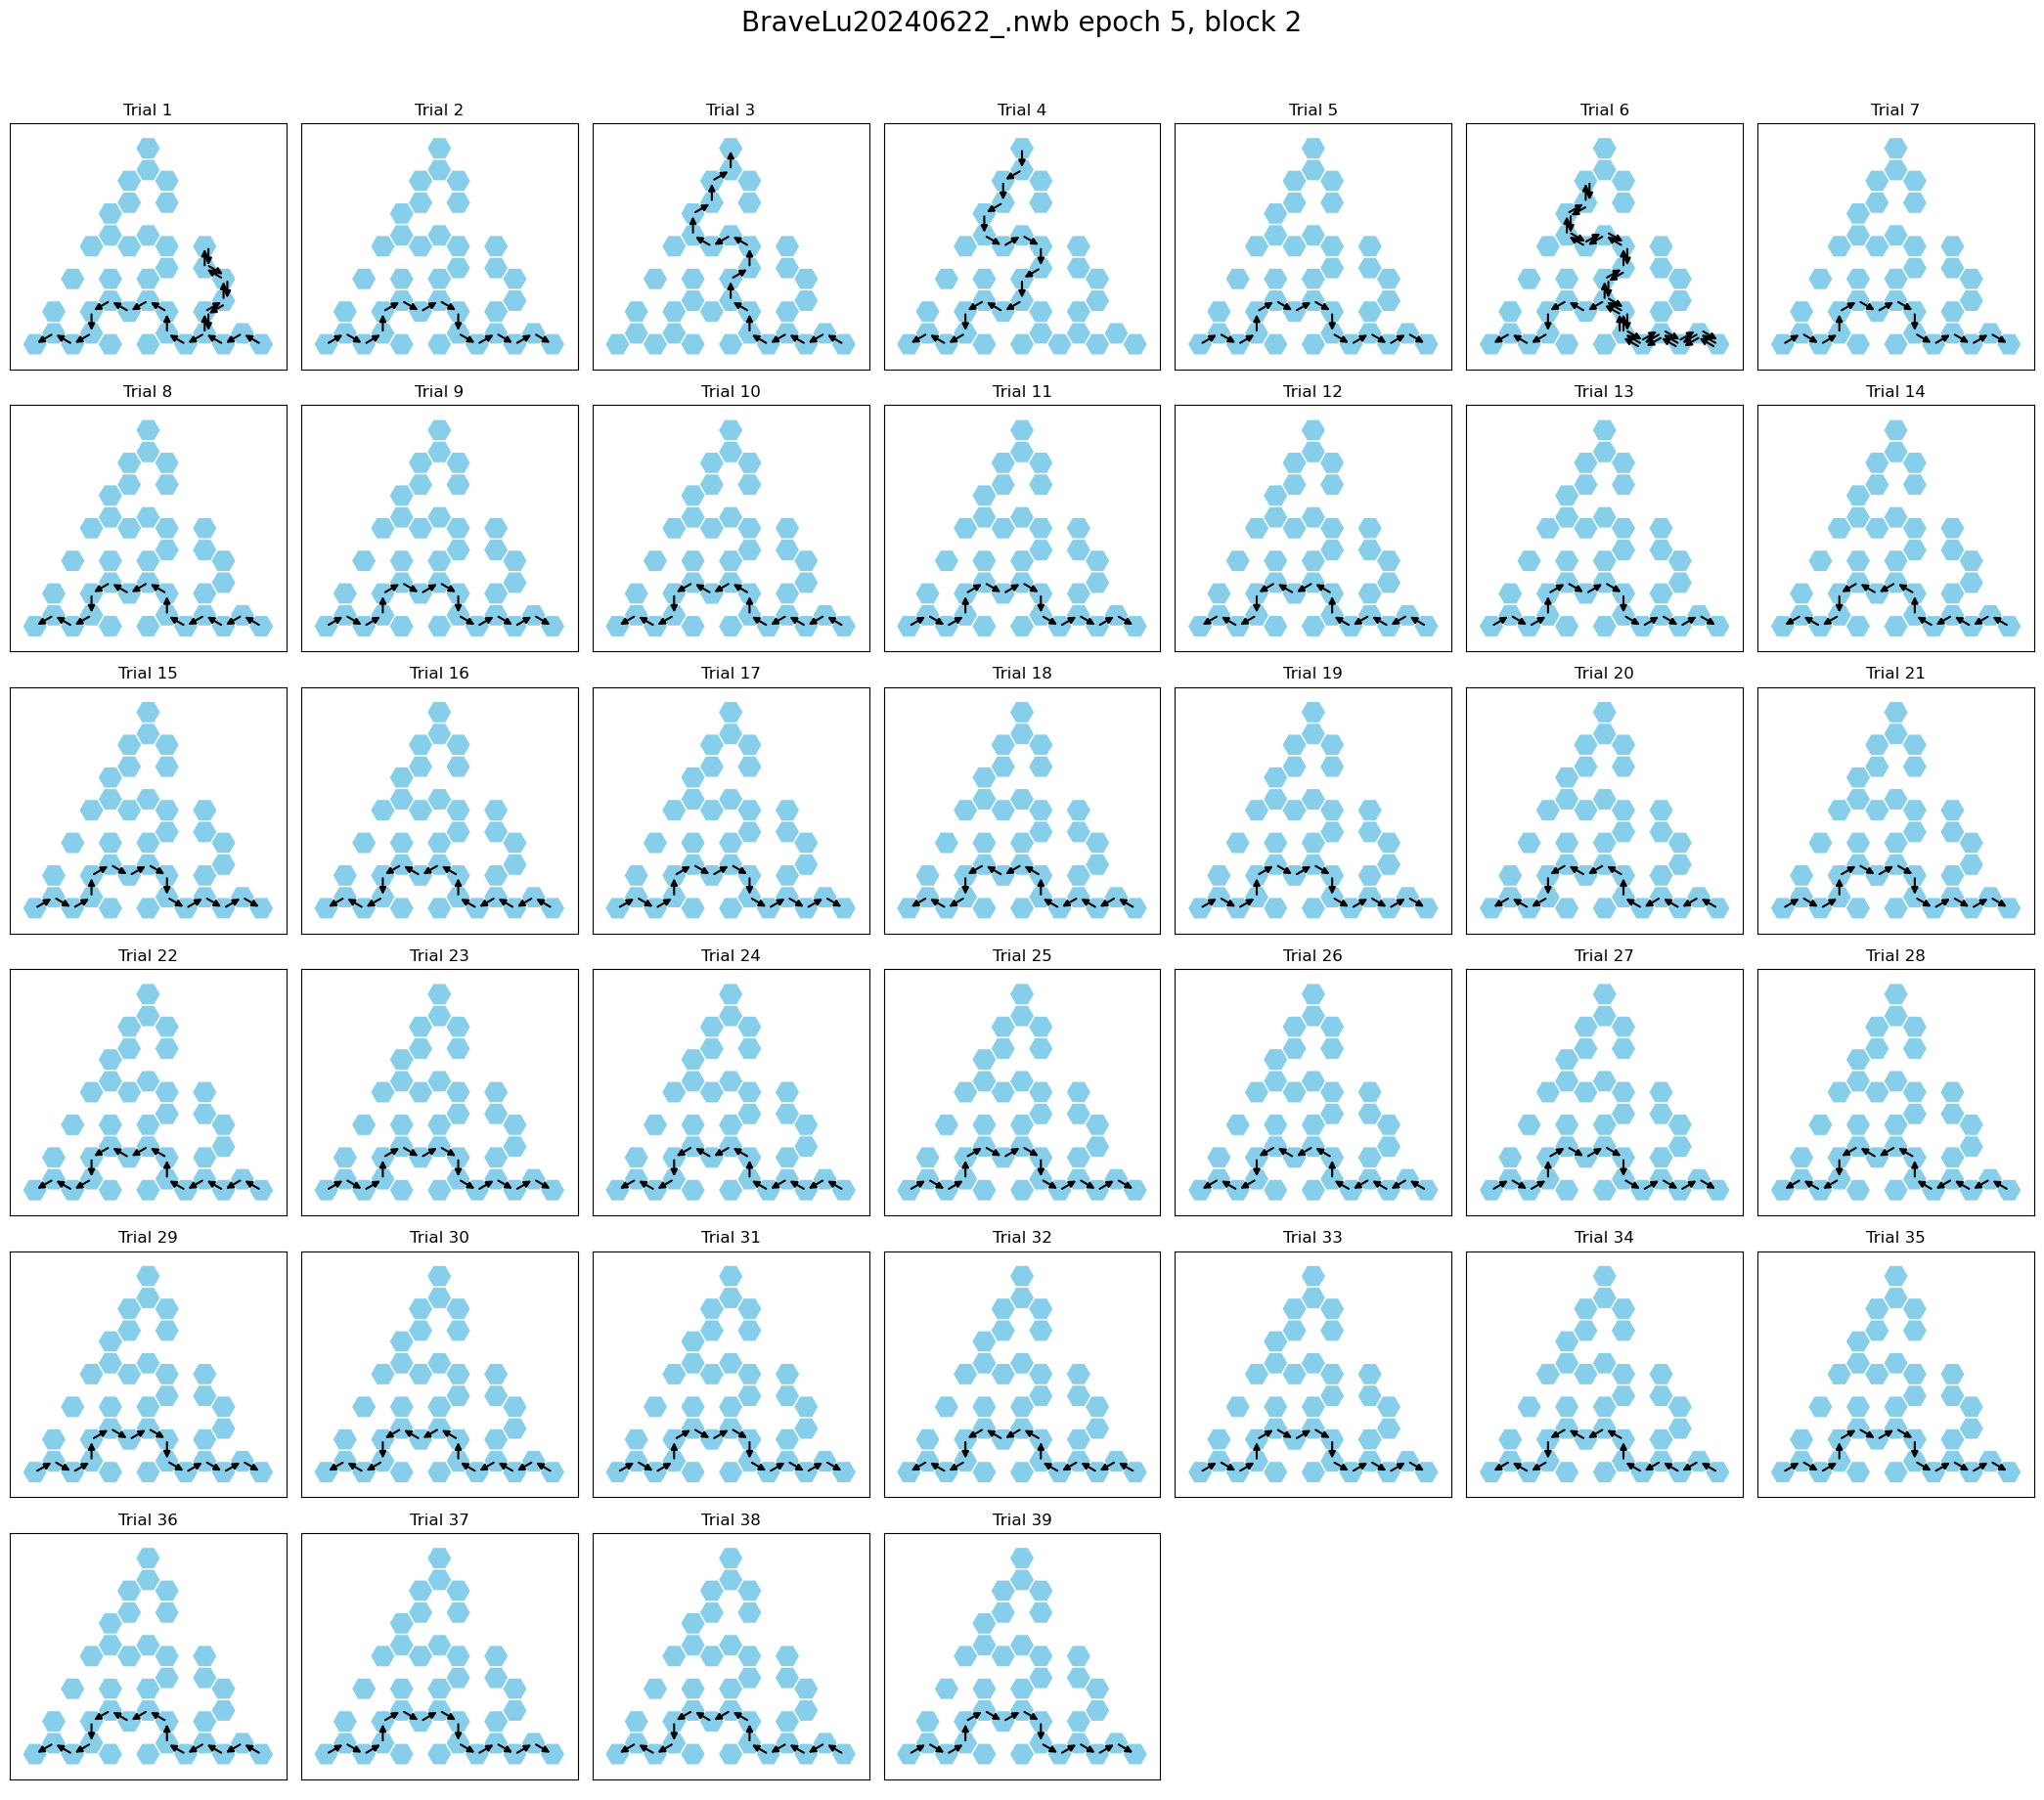

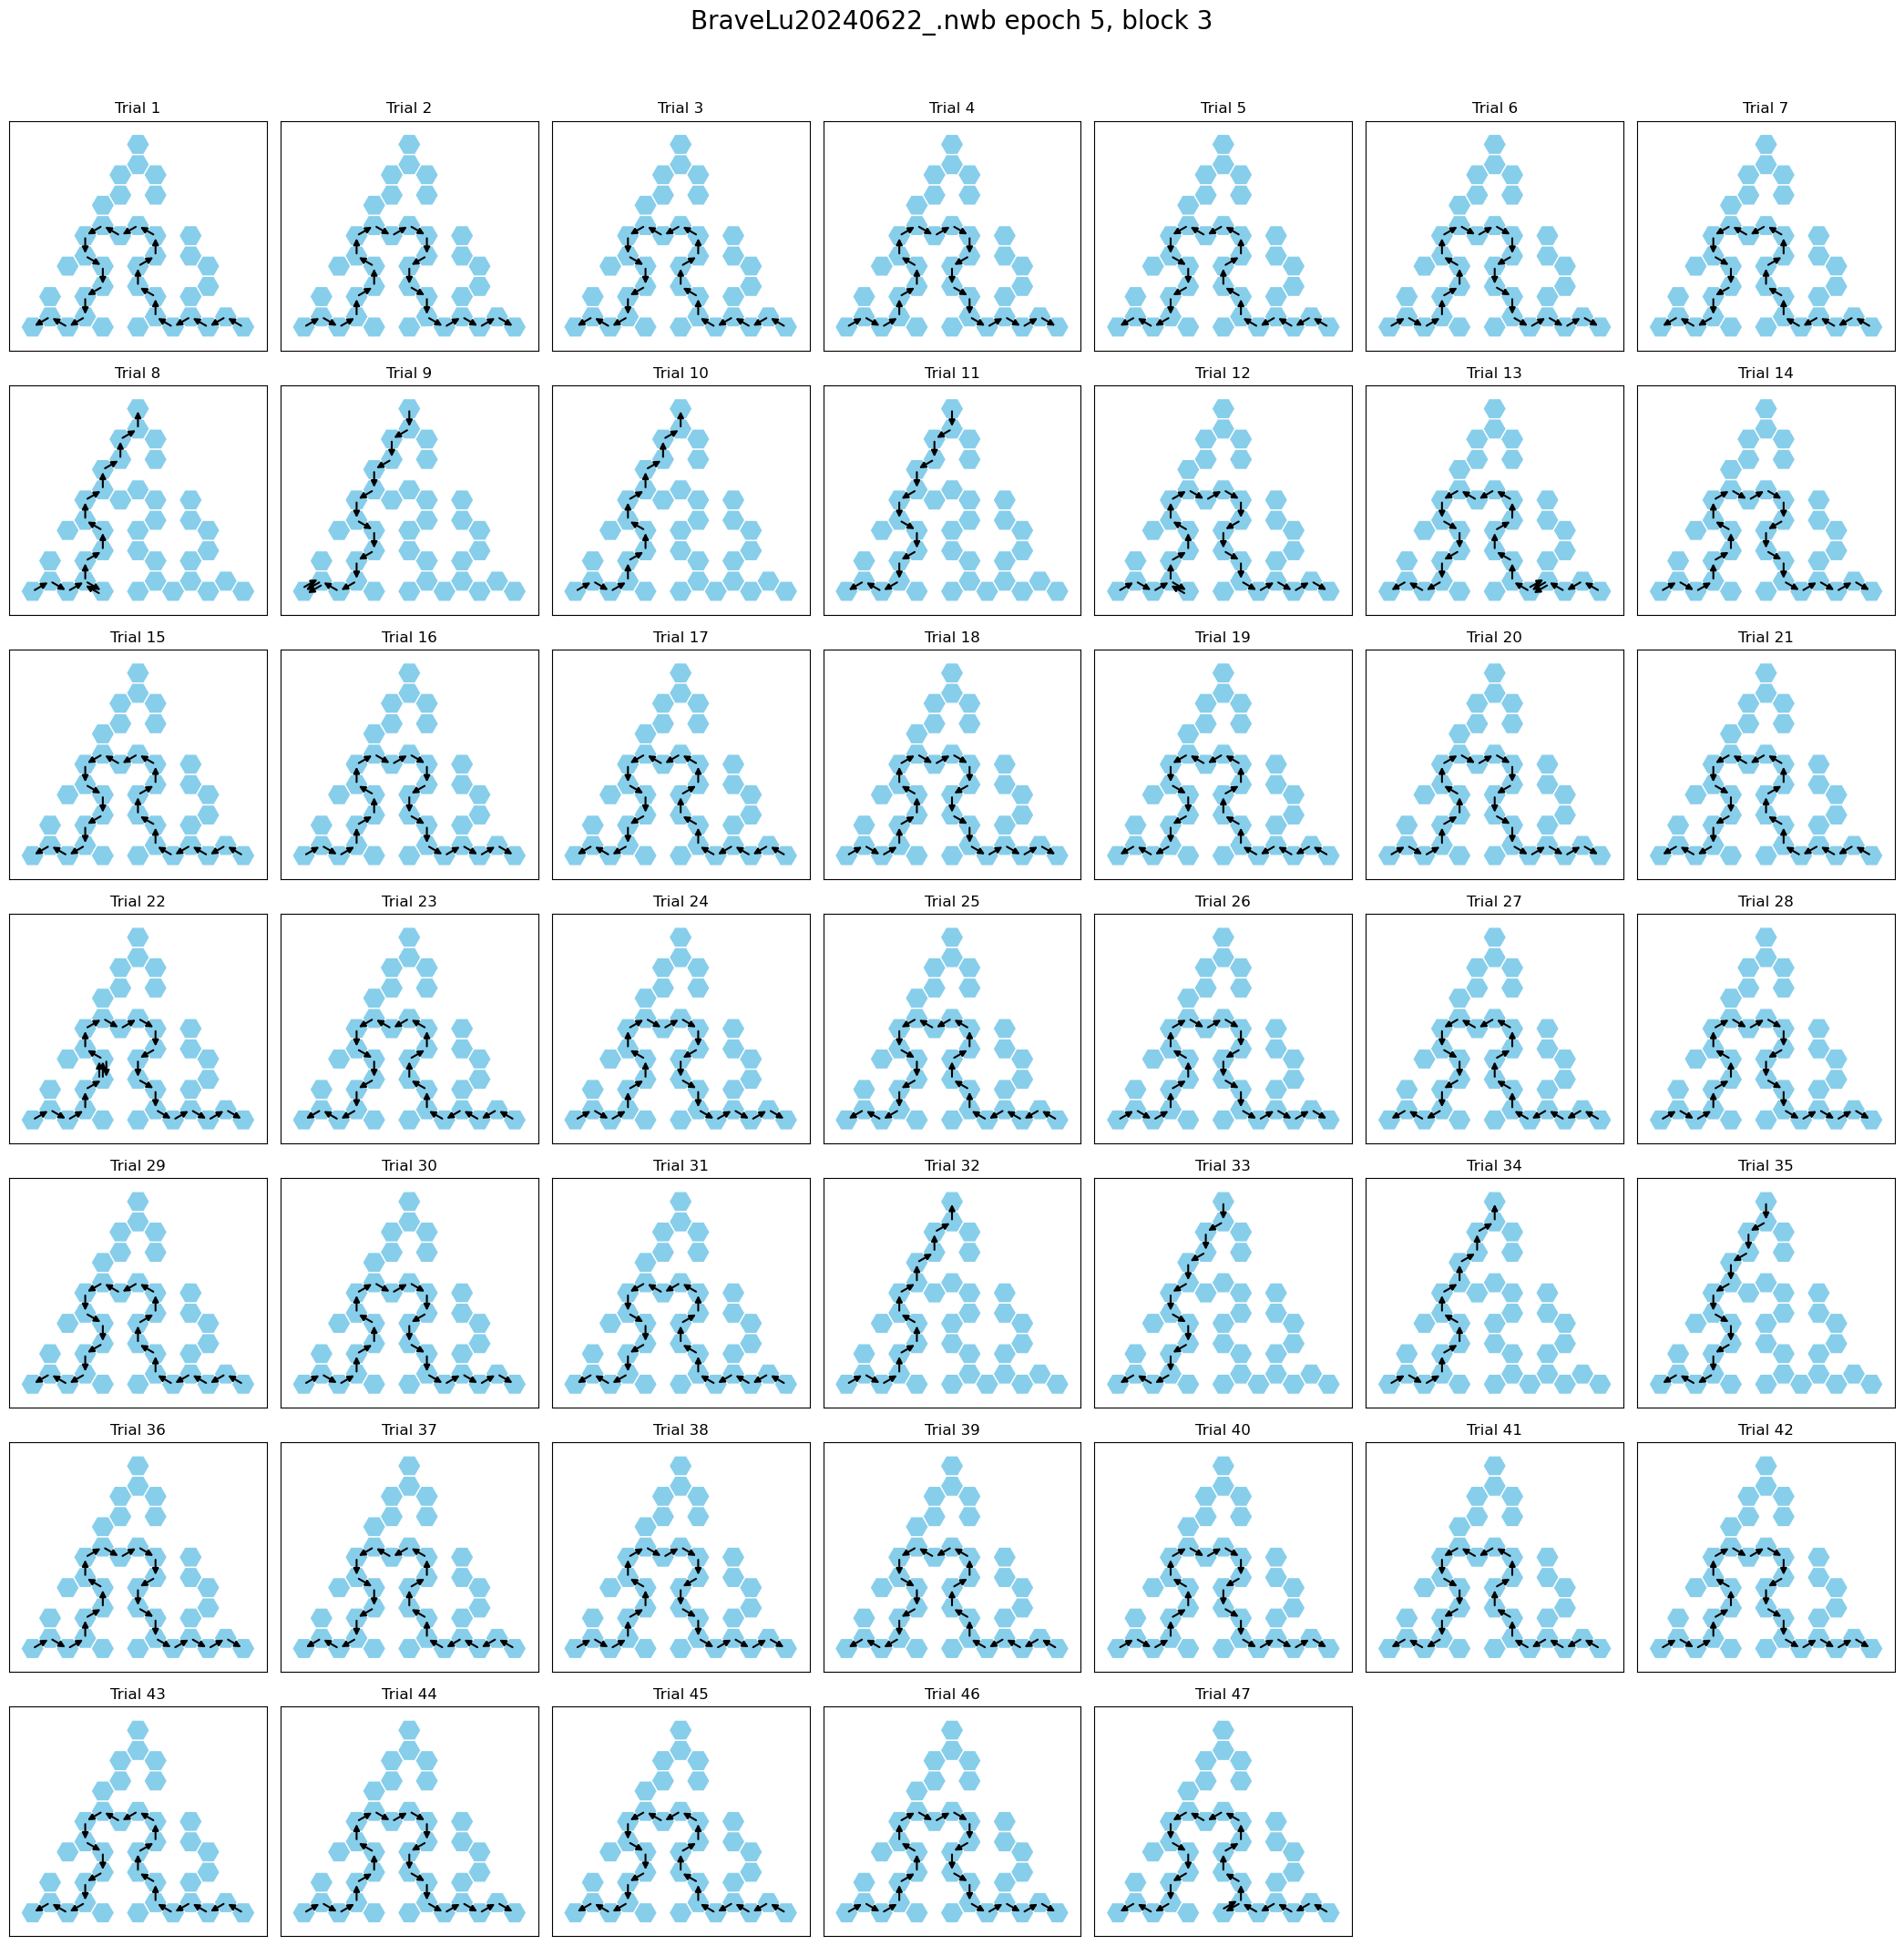

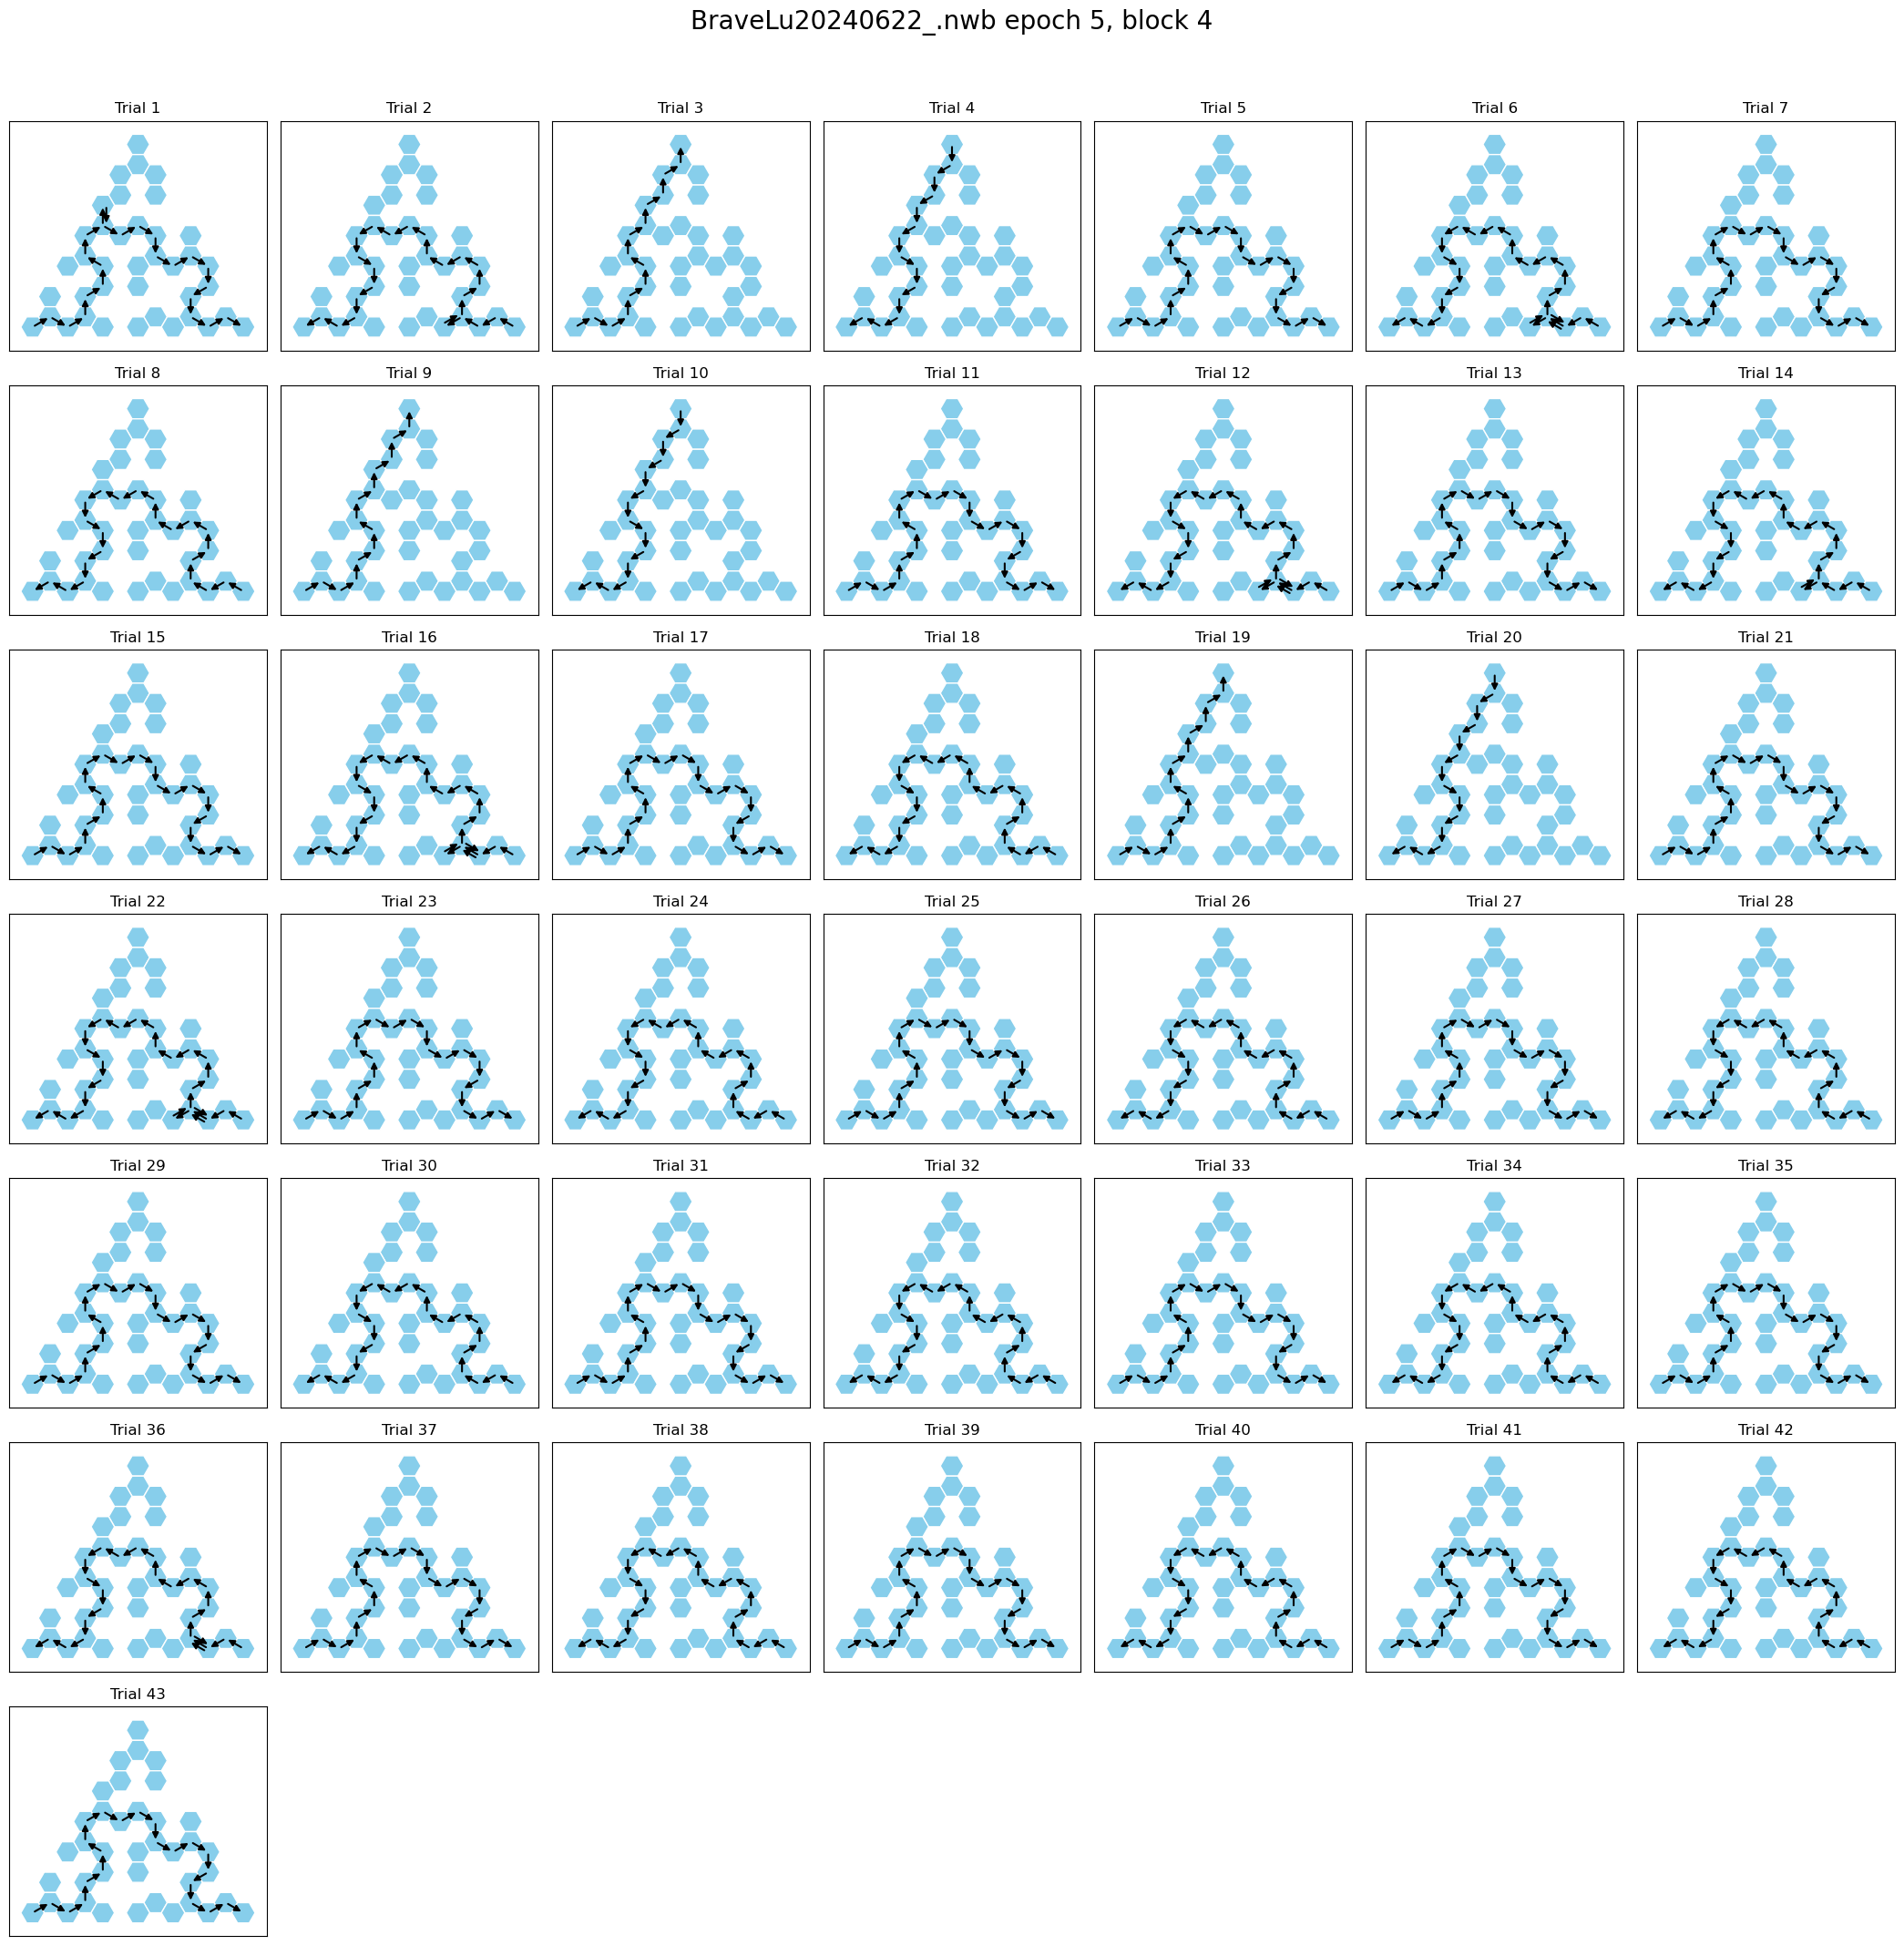

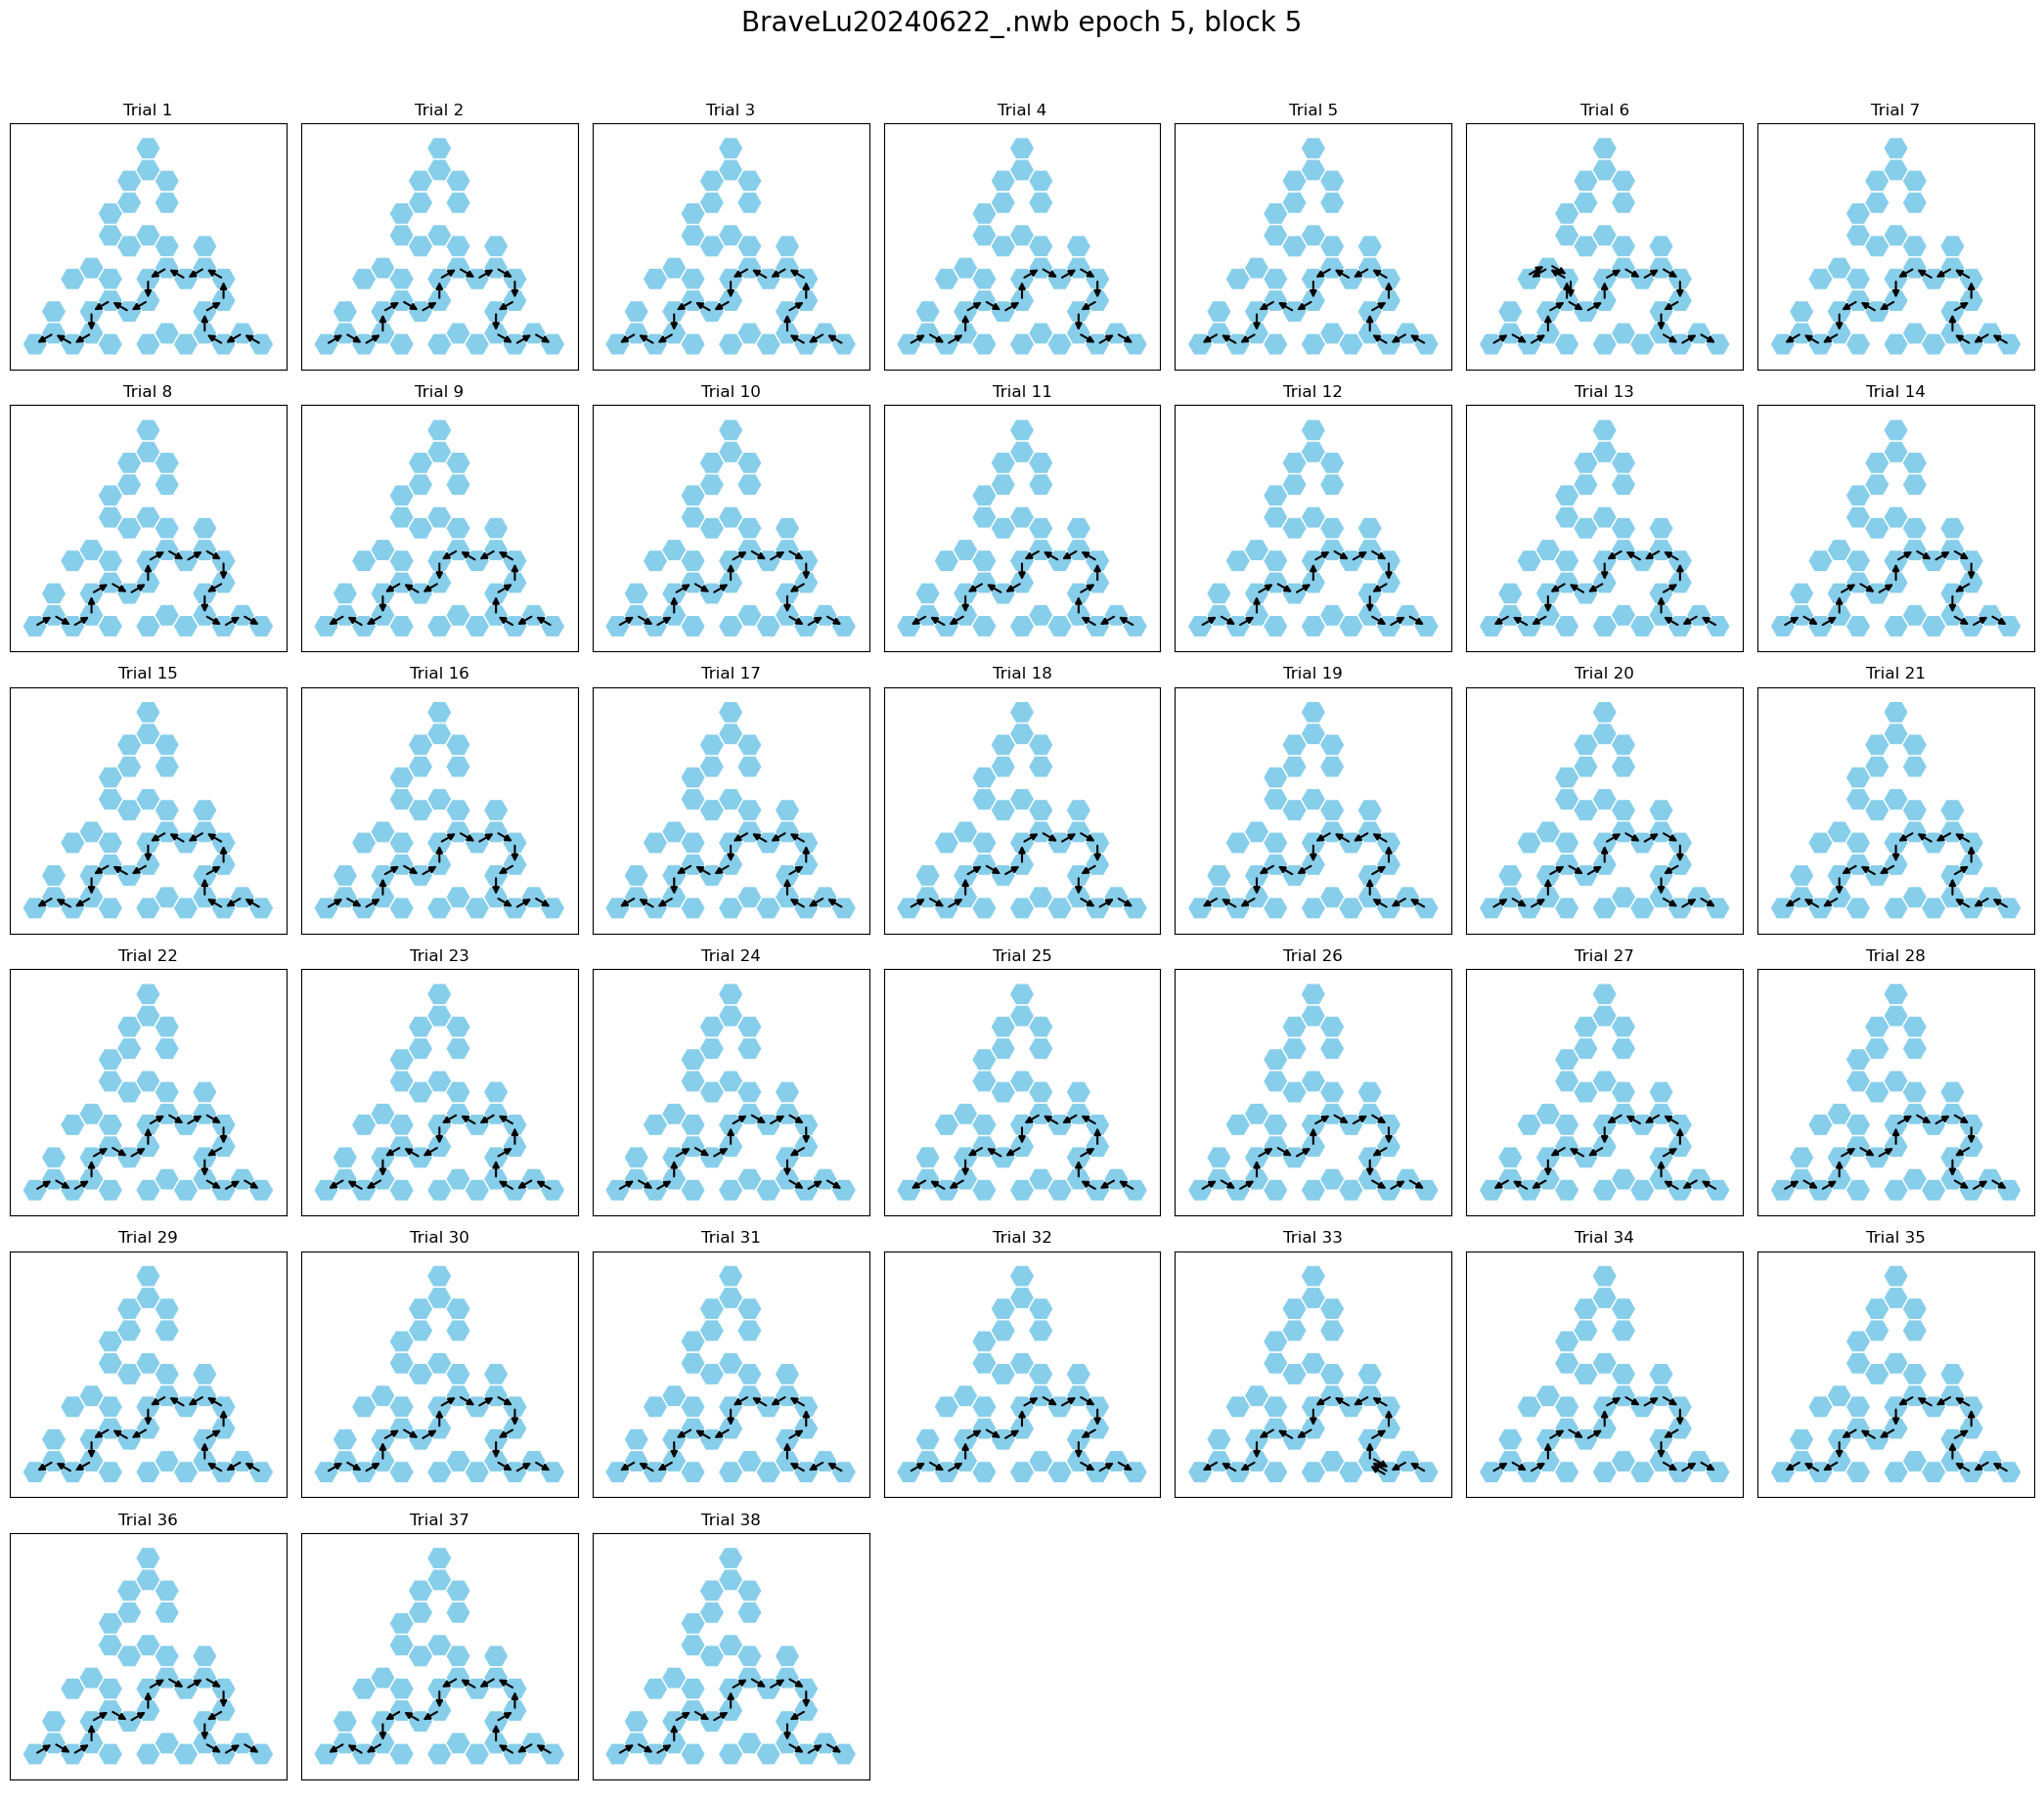

In [ ]:
nwb_file_name = 'BraveLu20240622_.nwb'
epoch = 5
nwb_key = {"nwb_file_name" : nwb_file_name}
nwb_epoch_key = {"nwb_file_name" : nwb_file_name, "epoch": epoch}

ax = (HexPath() & nwb_epoch_key).plot_block(block=1, show_stats=False)
ax = (HexPath() & nwb_epoch_key).plot_block(block=2, show_stats=False)
ax = (HexPath() & nwb_epoch_key).plot_block(block=3, show_stats=False)
ax = (HexPath() & nwb_epoch_key).plot_block(block=4, show_stats=False)
ax = (HexPath() & nwb_epoch_key).plot_block(block=5, show_stats=False)